# Convolutional Neural Network with Fashion MNIST Dataset

Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms. Han Xiao, Kashif Rasul, Roland Vollgraf. arXiv:1708.07747

References:
* https://towardsdatascience.com/building-a-convolutional-neural-network-cnn-in-keras-329fbbadc5f5

Label	Description
* 0	T-shirt/top
* 1	Trouser
* 2	Pullover
* 3	Dress
* 4	Coat
* 5	Sandal
* 6	Shirt
* 7	Sneaker
* 8	Bag
* 9	Ankle boot

In [ ]:
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix, classification_report
import seaborn as sns
import pandas as pd

In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Import the data set

In [ ]:
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

4422102/4422102 [==============================] - 0s 0us/step


Data pre-processing

In [ ]:
#reshape data to fit model
X_train = X_train.reshape(48000,28,28,1)
X_val = X_val.reshape(12000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)
#The last 1 signifies that the images are greyscale

One-hot encode of our target variable

In [ ]:
#one-hot encode target column
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

Parameters

In [ ]:
input_shape = (28,28,1)
num_classes=10
n_epochs=20

# Model 1

In [ ]:
#create model
model = Sequential()
#add model layers
model.add(Conv2D(4, kernel_size=3, activation='relu', input_shape=input_shape))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

#compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 4)         40        
                                                                 
 flatten (Flatten)           (None, 2704)              0         
                                                                 
 dense_15 (Dense)            (None, 10)                27050     
                                                                 
Total params: 27,090
Trainable params: 27,090
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=n_epochs)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 26, 26, 4)         40        
                                                                 
 flatten_8 (Flatten)         (None, 2704)              0         
                                                                 
 dense_11 (Dense)            (None, 10)                27050     
                                                                 
Total params: 27,090
Trainable params: 27,090
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.9591 - accuracy: 0.7973 - val_loss: 0.4752 - val_accuracy: 0.8432
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3906 - accuracy: 0.8660 - val_loss: 0.4451 - val_accuracy: 0.8472
Epoch 3/20
1500/1500 [====

# Evaluation of Model 1

In [ ]:
#Loss function: Categorical Cross Entropy
cross_entropy = model.evaluate(X_test,y_test,verbose=0)
cross_entropy

[0.6398939490318298, 0.843500018119812]

In [ ]:
test_predictions = model.predict(X_test)
y_predicted = []
for i in range(10000):
  y_predicted.append(np.argmax(test_predictions[i]))
y_true = []
for i in range(10000):
  y_true.append(np.argmax(y_test[i]))

print(classification_report(y_true, y_predicted))

313/313 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.77      0.75      0.76      1000
           1       0.98      0.96      0.97      1000
           2       0.73      0.76      0.75      1000
           3       0.83      0.86      0.84      1000
           4       0.75      0.72      0.74      1000
           5       0.94      0.97      0.96      1000
           6       0.60      0.60      0.60      1000
           7       0.92      0.94      0.93      1000
           8       0.96      0.94      0.95      1000
           9       0.97      0.93      0.95      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


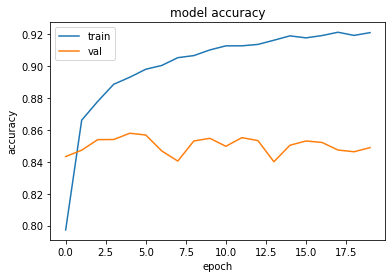

In [ ]:
# list all data in history
print(history.history.keys()) 
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Model 2

In [ ]:
#create model
model_2 = Sequential()
#add model layers
model_2.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=input_shape))
model_2.add(Flatten())
model_2.add(Dense(num_classes, activation='softmax'))

#compile the model
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 flatten_1 (Flatten)         (None, 21632)             0         
                                                                 
 dense_16 (Dense)            (None, 10)                216330    
                                                                 
Total params: 216,650
Trainable params: 216,650
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#train the model
history_2 = model_2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=n_epochs)

Epoch 1/20
1500/1500 [==============================] - 6s 4ms/step - loss: 1.2862 - accuracy: 0.8344 - val_loss: 0.3932 - val_accuracy: 0.8654
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3132 - accuracy: 0.8896 - val_loss: 0.4002 - val_accuracy: 0.8716
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2646 - accuracy: 0.9061 - val_loss: 0.3963 - val_accuracy: 0.8717
Epoch 4/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2432 - accuracy: 0.9125 - val_loss: 0.4619 - val_accuracy: 0.8610
Epoch 5/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2216 - accuracy: 0.9196 - val_loss: 0.4674 - val_accuracy: 0.8647
Epoch 6/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1976 - accuracy: 0.9272 - val_loss: 0.5123 - val_accuracy: 0.8673
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1832 - accuracy: 0.9321 - val_loss: 0.5560 - val_accuracy:

# Evaluation of Model 2

In [ ]:
#Loss function: Categorical Cross Entropy
cross_entropy_2 = model.evaluate(X_test,y_test,verbose=0)
cross_entropy_2

[0.6398939490318298, 0.843500018119812]

In [ ]:
test_predictions_2 = model_2.predict(X_test)
y_predicted_2 = []
for i in range(10000):
  y_predicted_2.append(np.argmax(test_predictions_2[i]))
y_true = []
for i in range(10000):
  y_true.append(np.argmax(y_test[i]))

print(classification_report(y_true, y_predicted_2))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.78      0.79      0.79      1000
           1       0.97      0.98      0.97      1000
           2       0.75      0.74      0.74      1000
           3       0.88      0.83      0.85      1000
           4       0.73      0.73      0.73      1000
           5       0.96      0.95      0.95      1000
           6       0.60      0.62      0.61      1000
           7       0.92      0.95      0.94      1000
           8       0.97      0.96      0.96      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


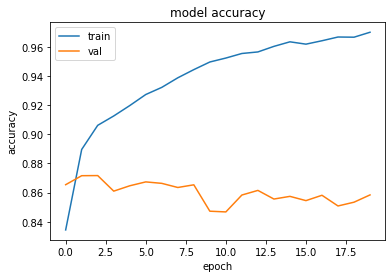

In [ ]:
# list all data in history
print(history_2.history.keys()) 
# summarize history for accuracy
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Model 3

In [ ]:
#create model
model_3 = Sequential()
#add model layers
model_3.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=input_shape))
model_3.add(Conv2D(64, kernel_size=3, activation='relu'))
model_3.add(Flatten())
model_3.add(Dense(num_classes, activation='softmax'))

#compile the model
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 flatten_2 (Flatten)         (None, 36864)             0         
                                                                 
 dense_17 (Dense)            (None, 10)                368650    
                                                                 
Total params: 387,466
Trainable params: 387,466
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#train the model
history_3 = model_3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=n_epochs)

Epoch 1/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.8876 - accuracy: 0.8356 - val_loss: 0.4196 - val_accuracy: 0.8472
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3162 - accuracy: 0.8868 - val_loss: 0.3471 - val_accuracy: 0.8777
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2530 - accuracy: 0.9061 - val_loss: 0.3737 - val_accuracy: 0.8720
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2168 - accuracy: 0.9207 - val_loss: 0.3915 - val_accuracy: 0.8795
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1839 - accuracy: 0.9315 - val_loss: 0.4288 - val_accuracy: 0.8766
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1594 - accuracy: 0.9414 - val_loss: 0.4704 - val_accuracy: 0.8788
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1377 - accuracy: 0.9499 - val_loss: 0.5023 - val_accuracy:

# Evaluation of Model 3

In [ ]:
#Loss function: Categorical Cross Entropy
cross_entropy_3 = model.evaluate(X_test,y_test,verbose=0)
cross_entropy_3

[0.6398939490318298, 0.843500018119812]

In [ ]:
test_predictions_3 = model_3.predict(X_test)
y_predicted_3 = []
for i in range(10000):
  y_predicted_3.append(np.argmax(test_predictions_3[i]))
y_true = []
for i in range(10000):
  y_true.append(np.argmax(y_test[i]))

print(classification_report(y_true, y_predicted_3))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1000
           1       0.98      0.97      0.98      1000
           2       0.75      0.79      0.77      1000
           3       0.89      0.86      0.88      1000
           4       0.78      0.79      0.79      1000
           5       0.95      0.96      0.96      1000
           6       0.66      0.63      0.64      1000
           7       0.94      0.94      0.94      1000
           8       0.97      0.96      0.96      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


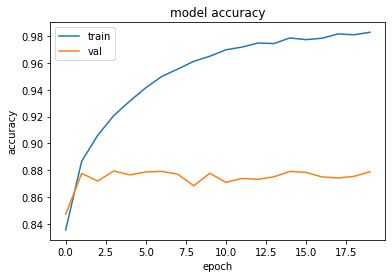

In [ ]:
# list all data in history
print(history_3.history.keys()) 
# summarize history for accuracy
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Model 4

In [ ]:
#create model
model_4 = Sequential()
#add model layers
model_4.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=input_shape))
model_4.add(Conv2D(64, kernel_size=3, activation='relu'))
model_4.add(Conv2D(128, kernel_size=3, activation='relu'))
model_4.add(Flatten())
model_4.add(Dense(num_classes, activation='softmax'))

#compile the model
model_4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_4.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_6 (Conv2D)           (None, 22, 22, 128)       73856     
                                                                 
 flatten_3 (Flatten)         (None, 61952)             0         
                                                                 
 dense_18 (Dense)            (None, 10)                619530    
                                                                 
Total params: 712,202
Trainable params: 712,202
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#train the model
history_4 = model_4.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=n_epochs)

Epoch 1/20
1500/1500 [==============================] - 10s 6ms/step - loss: 0.6309 - accuracy: 0.8437 - val_loss: 0.3443 - val_accuracy: 0.8737
Epoch 2/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3041 - accuracy: 0.8916 - val_loss: 0.3235 - val_accuracy: 0.8827
Epoch 3/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2513 - accuracy: 0.9089 - val_loss: 0.3223 - val_accuracy: 0.8865
Epoch 4/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2155 - accuracy: 0.9206 - val_loss: 0.3539 - val_accuracy: 0.8828
Epoch 5/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1876 - accuracy: 0.9307 - val_loss: 0.3754 - val_accuracy: 0.8921
Epoch 6/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1556 - accuracy: 0.9434 - val_loss: 0.3958 - val_accuracy: 0.8853
Epoch 7/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1382 - accuracy: 0.9495 - val_loss: 0.4219 - val_accuracy

# Evaluation of Model 4

In [ ]:
#Loss function: Categorical Cross Entropy
cross_entropy_4 = model.evaluate(X_test,y_test,verbose=0)
cross_entropy_4

[0.6398939490318298, 0.843500018119812]

In [ ]:
test_predictions_4 = model_4.predict(X_test)
y_predicted_4 = []
for i in range(10000):
  y_predicted_4.append(np.argmax(test_predictions_4[i]))
y_true = []
for i in range(10000):
  y_true.append(np.argmax(y_test[i]))

print(classification_report(y_true, y_predicted_4))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1000
           1       0.98      0.97      0.97      1000
           2       0.81      0.74      0.77      1000
           3       0.90      0.87      0.89      1000
           4       0.73      0.84      0.78      1000
           5       0.97      0.96      0.96      1000
           6       0.66      0.60      0.63      1000
           7       0.95      0.93      0.94      1000
           8       0.96      0.96      0.96      1000
           9       0.93      0.96      0.94      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


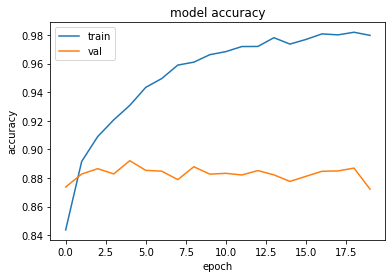

In [ ]:
# list all data in history
print(history_4.history.keys()) 
# summarize history for accuracy
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Model 5

In [ ]:
#create model
model_5 = Sequential()
#add model layers
model_5.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=input_shape))
model_5.add(Conv2D(64, kernel_size=3, activation='relu'))
model_5.add(Conv2D(128, kernel_size=3, activation='relu'))
model_5.add(Flatten())
model_5.add(Dense(128,activation='relu'))
model_5.add(Dropout(0.5)) #to avoid overfitting
model_5.add(Dense(num_classes, activation='softmax'))

#compile the model
model_5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_5.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_8 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 22, 22, 128)       73856     
                                                                 
 flatten_4 (Flatten)         (None, 61952)             0         
                                                                 
 dense_19 (Dense)            (None, 128)               7929984   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_20 (Dense)            (None, 10)               

In [ ]:
#train the model
history_5 = model_5.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=n_epochs)

Epoch 1/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.8528 - accuracy: 0.8155 - val_loss: 0.3378 - val_accuracy: 0.8751
Epoch 2/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3593 - accuracy: 0.8695 - val_loss: 0.3396 - val_accuracy: 0.8759
Epoch 3/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3047 - accuracy: 0.8903 - val_loss: 0.2910 - val_accuracy: 0.8927
Epoch 4/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2666 - accuracy: 0.9029 - val_loss: 0.2986 - val_accuracy: 0.8989
Epoch 5/20
1500/1500 [==============================] - 11s 8ms/step - loss: 0.2416 - accuracy: 0.9103 - val_loss: 0.2923 - val_accuracy: 0.9000
Epoch 6/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2131 - accuracy: 0.9201 - val_loss: 0.3109 - val_accuracy: 0.8997
Epoch 7/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1995 - accuracy: 0.9275 - val_loss: 0.3147 - val_ac

# Evaluation of Model 5

In [ ]:
#Loss function: Categorical Cross Entropy
cross_entropy_5 = model.evaluate(X_test,y_test,verbose=0)
cross_entropy_5

[0.6398939490318298, 0.843500018119812]

In [ ]:
test_predictions_5 = model_5.predict(X_test)
y_predicted_5 = []
for i in range(10000):
  y_predicted_5.append(np.argmax(test_predictions_5[i]))
y_true = []
for i in range(10000):
  y_true.append(np.argmax(y_test[i]))

print(classification_report(y_true, y_predicted_5))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1000
           1       1.00      0.97      0.98      1000
           2       0.83      0.86      0.85      1000
           3       0.88      0.91      0.90      1000
           4       0.83      0.84      0.84      1000
           5       0.97      0.99      0.98      1000
           6       0.73      0.72      0.73      1000
           7       0.95      0.96      0.96      1000
           8       0.98      0.97      0.97      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


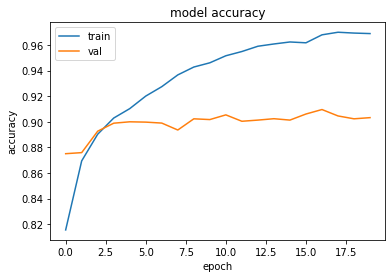

In [ ]:
# list all data in history
print(history_5.history.keys()) 
# summarize history for accuracy
plt.plot(history_5.history['accuracy'])
plt.plot(history_5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Model 6

In [72]:
#create model
model_6 = Sequential()
#add model layers
model_6.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=input_shape))
model_6.add(Conv2D(64, kernel_size=3, activation='relu'))
model_6.add(MaxPooling2D(pool_size=(2,2)))
model_6.add(Conv2D(128, kernel_size=3, activation='relu'))
model_6.add(Flatten())
model_6.add(Dense(128,activation='relu'))
model_6.add(Dropout(0.5)) #to avoid overfitting
model_6.add(Dense(num_classes, activation='softmax'))

#compile the model
model_6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_6.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_13 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 10, 10, 128)       73856     
                                                                 
 flatten_4 (Flatten)         (None, 12800)             0         
                                                                 
 dense_83 (Dense)            (None, 128)               1638528   
                                                     

In [73]:
#train the model
history_6 = model_6.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=n_epochs)

Epoch 1/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.6768 - accuracy: 0.8050 - val_loss: 0.3810 - val_accuracy: 0.8553
Epoch 2/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3811 - accuracy: 0.8627 - val_loss: 0.3205 - val_accuracy: 0.8821
Epoch 3/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3364 - accuracy: 0.8772 - val_loss: 0.2988 - val_accuracy: 0.8906
Epoch 4/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3019 - accuracy: 0.8895 - val_loss: 0.3016 - val_accuracy: 0.8834
Epoch 5/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2844 - accuracy: 0.8941 - val_loss: 0.2721 - val_accuracy: 0.8982
Epoch 6/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2658 - accuracy: 0.9025 - val_loss: 0.2874 - val_accuracy: 0.8990
Epoch 7/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2428 - accuracy: 0.9099 - val_loss: 0.2985 - val_accuracy:

# Evaluation of Model 6

In [75]:
#Loss function: Categorical Cross Entropy
cross_entropy_6 = model_6.evaluate(X_test,y_test,verbose=0)
cross_entropy_6

[0.4293234348297119, 0.9085999727249146]

In [76]:
test_predictions_6 = model_6.predict(X_test)
y_predicted_6 = []
for i in range(10000):
  y_predicted_6.append(np.argmax(test_predictions_6[i]))
y_true = []
for i in range(10000):
  y_true.append(np.argmax(y_test[i]))

print(classification_report(y_true, y_predicted_6))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1000
           1       0.99      0.98      0.98      1000
           2       0.80      0.90      0.85      1000
           3       0.93      0.90      0.92      1000
           4       0.85      0.84      0.85      1000
           5       0.98      0.98      0.98      1000
           6       0.79      0.68      0.73      1000
           7       0.96      0.98      0.97      1000
           8       0.96      0.98      0.97      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


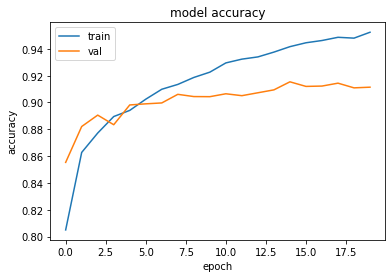

In [77]:
# list all data in history
print(history_6.history.keys()) 
# summarize history for accuracy
plt.plot(history_6.history['accuracy'])
plt.plot(history_6.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Confusion Matrix (reference: https://stackoverflow.com/questions/65618137/confusion-matrix-for-multiple-classes-in-python)

Text(0.5, 1.0, 'Confusion Matrix')

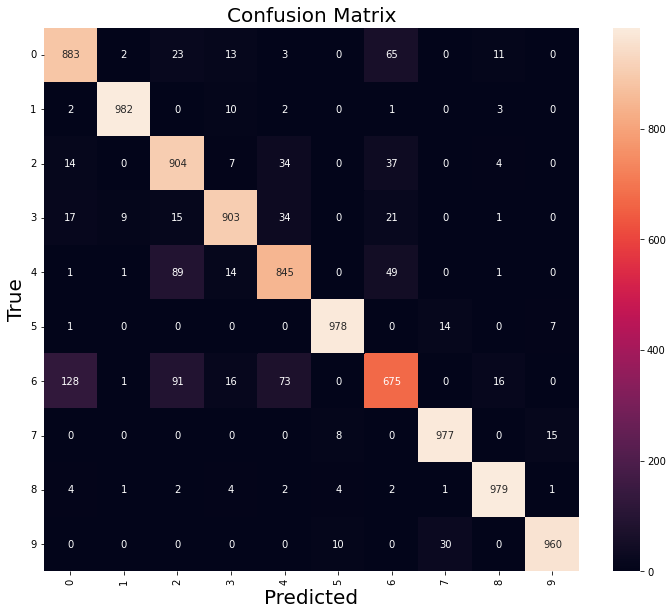

In [78]:
cm = confusion_matrix(y_true, y_predicted_6)
# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(12, 10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.tick_bottom()
ax.set_ylabel('True', fontsize=20)
plt.yticks(rotation=0)

plt.title('Confusion Matrix', fontsize=20)

# Model 7

In [ ]:
#create model
model_7 = Sequential()
#add model layers
model_7.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=input_shape))
model_7.add(MaxPooling2D(pool_size=(2,2)))
model_7.add(Conv2D(64, kernel_size=3, activation='relu'))
model_7.add(MaxPooling2D(pool_size=(2,2)))
model_7.add(Conv2D(128, kernel_size=3, activation='relu'))
model_7.add(MaxPooling2D(pool_size=(2,2)))
model_7.add(Flatten())
model_7.add(Dense(128,activation='relu'))
model_7.add(Dropout(0.5)) #to avoid overfitting
model_7.add(Dense(num_classes, activation='softmax'))

#compile the model
model_7.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_7.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 1, 1, 128)       

In [ ]:
#train the model
history_7 = model_7.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=n_epochs)

Epoch 1/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.8142 - accuracy: 0.7380 - val_loss: 0.4933 - val_accuracy: 0.8178
Epoch 2/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.4985 - accuracy: 0.8228 - val_loss: 0.4237 - val_accuracy: 0.8471
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4387 - accuracy: 0.8420 - val_loss: 0.4172 - val_accuracy: 0.8472
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4082 - accuracy: 0.8521 - val_loss: 0.3795 - val_accuracy: 0.8603
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3803 - accuracy: 0.8608 - val_loss: 0.3711 - val_accuracy: 0.8681
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3667 - accuracy: 0.8665 - val_loss: 0.3684 - val_accuracy: 0.8643
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3472 - accuracy: 0.8728 - val_loss: 0.3627 - val_accuracy:

# Evaluation of Model 7

In [ ]:
#Loss function: Categorical Cross Entropy
cross_entropy_7 = model.evaluate(X_test,y_test,verbose=0)
cross_entropy_7

[0.6398939490318298, 0.843500018119812]

In [ ]:
test_predictions_7 = model_7.predict(X_test)
y_predicted_7 = []
for i in range(10000):
  y_predicted_7.append(np.argmax(test_predictions_7[i]))
y_true = []
for i in range(10000):
  y_true.append(np.argmax(y_test[i]))

print(classification_report(y_true, y_predicted_7))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.75      0.86      0.80      1000
           3       0.87      0.89      0.88      1000
           4       0.81      0.77      0.79      1000
           5       0.98      0.94      0.96      1000
           6       0.67      0.60      0.64      1000
           7       0.93      0.96      0.95      1000
           8       0.97      0.96      0.97      1000
           9       0.95      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.87     10000
weighted avg       0.88      0.88      0.87     10000



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


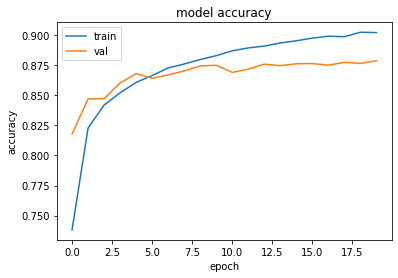

In [ ]:
# list all data in history
print(history_7.history.keys()) 
# summarize history for accuracy
plt.plot(history_7.history['accuracy'])
plt.plot(history_7.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Model 8

In [ ]:
#create model
model_8 = Sequential()
#add model layers
model_8.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=input_shape))
model_8.add(MaxPooling2D(pool_size=(2,2)))
model_8.add(Conv2D(64, kernel_size=3, activation='relu'))
model_8.add(MaxPooling2D(pool_size=(2,2)))
model_8.add(Conv2D(128, kernel_size=3, activation='relu'))
model_8.add(MaxPooling2D(pool_size=(2,2)))
model_8.add(Flatten())
model_8.add(Dense(32,activation='relu'))
#model_8.add(Dropout(0.5)) #to avoid overfitting
model_8.add(Dense(num_classes, activation='softmax'))

#compile the model
model_8.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_8.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 1, 1, 128)      

In [ ]:
#train the model
history_8 = model_8.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=n_epochs)

Epoch 1/20
1500/1500 [==============================] - 19s 5ms/step - loss: 0.6246 - accuracy: 0.7957 - val_loss: 0.4368 - val_accuracy: 0.8442
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4028 - accuracy: 0.8545 - val_loss: 0.3912 - val_accuracy: 0.8551
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3547 - accuracy: 0.8688 - val_loss: 0.4134 - val_accuracy: 0.8509
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3266 - accuracy: 0.8789 - val_loss: 0.3604 - val_accuracy: 0.8742
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2962 - accuracy: 0.8902 - val_loss: 0.3659 - val_accuracy: 0.8707
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2787 - accuracy: 0.8975 - val_loss: 0.3539 - val_accuracy: 0.8718
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2572 - accuracy: 0.9035 - val_loss: 0.3524 - val_accuracy

# Evaluation of Model 8

In [ ]:
#Loss function: Categorical Cross Entropy
cross_entropy_8 = model_8.evaluate(X_test,y_test,verbose=0)
cross_entropy_8

[0.5928441882133484, 0.8712999820709229]

In [ ]:
test_predictions_8 = model_8.predict(X_test)
y_predicted_8 = []
for i in range(10000):
  y_predicted_8.append(np.argmax(test_predictions_8[i]))
y_true = []
for i in range(10000):
  y_true.append(np.argmax(y_test[i]))

print(classification_report(y_true, y_predicted_8))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1000
           1       0.99      0.97      0.98      1000
           2       0.75      0.84      0.79      1000
           3       0.92      0.82      0.87      1000
           4       0.84      0.76      0.80      1000
           5       0.98      0.96      0.97      1000
           6       0.61      0.69      0.65      1000
           7       0.96      0.94      0.94      1000
           8       0.98      0.96      0.97      1000
           9       0.93      0.97      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


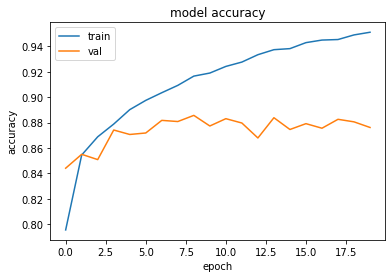

In [ ]:
# list all data in history
print(history_8.history.keys()) 
# summarize history for accuracy
plt.plot(history_8.history['accuracy'])
plt.plot(history_8.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Model 9

In [79]:
#create model
model_9 = Sequential()
#add model layers
model_9.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=input_shape))
model_9.add(Conv2D(64, kernel_size=3, activation='relu'))
model_9.add(MaxPooling2D(pool_size=(2,2)))
model_9.add(Conv2D(128, kernel_size=3, activation='relu'))
model_9.add(Flatten())
model_9.add(Dense(32,activation='relu'))
model_9.add(Dense(num_classes, activation='softmax'))

#compile the model
model_9.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_9.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_16 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 10, 10, 128)       73856     
                                                                 
 flatten_5 (Flatten)         (None, 12800)             0         
                                                                 
 dense_85 (Dense)            (None, 32)                409632    
                                                     

In [80]:
#train the model
history_9 = model_9.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=n_epochs)

Epoch 1/20
1500/1500 [==============================] - 62s 4ms/step - loss: 0.5596 - accuracy: 0.8323 - val_loss: 0.3284 - val_accuracy: 0.8815
Epoch 2/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2954 - accuracy: 0.8943 - val_loss: 0.3332 - val_accuracy: 0.8753
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2521 - accuracy: 0.9088 - val_loss: 0.2894 - val_accuracy: 0.8972
Epoch 4/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2252 - accuracy: 0.9167 - val_loss: 0.3338 - val_accuracy: 0.8852
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2001 - accuracy: 0.9261 - val_loss: 0.2973 - val_accuracy: 0.8999
Epoch 6/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1793 - accuracy: 0.9338 - val_loss: 0.2807 - val_accuracy: 0.9098
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1597 - accuracy: 0.9413 - val_loss: 0.3119 - val_accuracy

# Evaluation of Model 9

In [81]:
#Loss function: Categorical Cross Entropy
cross_entropy_9 = model_9.evaluate(X_test,y_test,verbose=0)
cross_entropy_9

[0.5697475075721741, 0.9031000137329102]

In [82]:
test_predictions_9 = model_9.predict(X_test)
y_predicted_9 = []
for i in range(10000):
  y_predicted_9.append(np.argmax(test_predictions_9[i]))
y_true = []
for i in range(10000):
  y_true.append(np.argmax(y_test[i]))

print(classification_report(y_true, y_predicted_9))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1000
           1       0.99      0.98      0.99      1000
           2       0.87      0.85      0.86      1000
           3       0.89      0.92      0.91      1000
           4       0.87      0.83      0.85      1000
           5       0.98      0.97      0.98      1000
           6       0.72      0.73      0.72      1000
           7       0.95      0.97      0.96      1000
           8       0.98      0.96      0.97      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


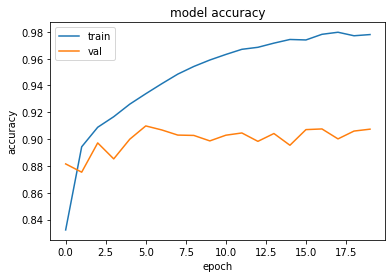

In [83]:
# list all data in history
print(history_9.history.keys()) 
# summarize history for accuracy
plt.plot(history_9.history['accuracy'])
plt.plot(history_9.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Confusion Matrix (reference: https://stackoverflow.com/questions/65618137/confusion-matrix-for-multiple-classes-in-python)

Text(0.5, 1.0, 'Confusion Matrix')

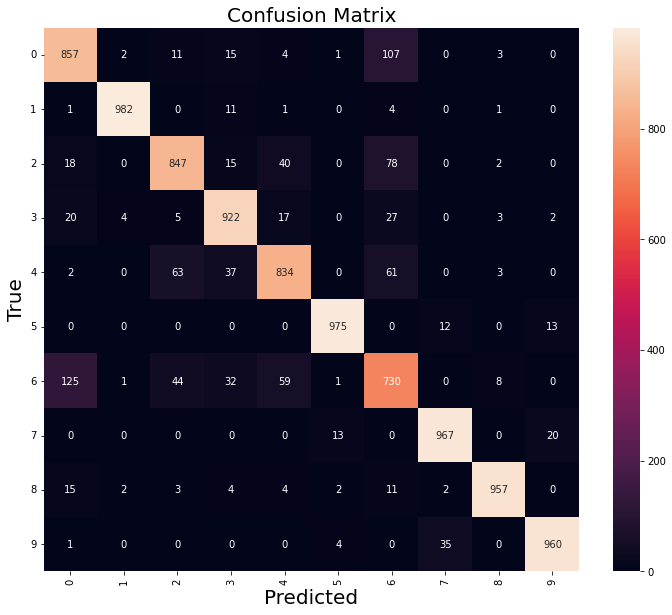

In [84]:
cm = confusion_matrix(y_true, y_predicted_9)
# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(12, 10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.tick_bottom()
ax.set_ylabel('True', fontsize=20)
plt.yticks(rotation=0)

plt.title('Confusion Matrix', fontsize=20)

# Model 10

In [ ]:
#create model
model_10 = Sequential()
#add model layers
model_10.add(Conv2D(32, kernel_size=5, activation='relu', input_shape=input_shape))
model_10.add(Conv2D(64, kernel_size=3, activation='relu'))
model_10.add(MaxPooling2D(pool_size=(2,2)))
model_10.add(Conv2D(128, kernel_size=3, activation='relu'))
model_10.add(Flatten())
model_10.add(Dense(32,activation='relu'))
#model_8.add(Dropout(0.5)) #to avoid overfitting
model_10.add(Dense(num_classes, activation='softmax'))

#compile the model
model_10.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_10.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 conv2d_23 (Conv2D)          (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 conv2d_24 (Conv2D)          (None, 9, 9, 128)         73856     
                                                                 
 flatten_9 (Flatten)         (None, 10368)             0         
                                                                 
 dense_29 (Dense)            (None, 32)                331808    
                                                     

In [ ]:
#train the model
history_10 = model_10.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=n_epochs)

Epoch 1/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.6865 - accuracy: 0.8155 - val_loss: 0.3665 - val_accuracy: 0.8741
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3213 - accuracy: 0.8873 - val_loss: 0.3256 - val_accuracy: 0.8857
Epoch 3/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2829 - accuracy: 0.8975 - val_loss: 0.3341 - val_accuracy: 0.8807
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2564 - accuracy: 0.9081 - val_loss: 0.3220 - val_accuracy: 0.8868
Epoch 5/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2463 - accuracy: 0.9099 - val_loss: 0.2928 - val_accuracy: 0.9000
Epoch 6/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2194 - accuracy: 0.9189 - val_loss: 0.3121 - val_accuracy: 0.8981
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2043 - accuracy: 0.9260 - val_loss: 0.3017 - val_accuracy:

# Evaluation of Model 10

In [ ]:
#Loss function: Categorical Cross Entropy
cross_entropy_10 = model_10.evaluate(X_test,y_test,verbose=0)
cross_entropy_10

[0.5753819942474365, 0.8978000283241272]

In [ ]:
test_predictions_10 = model_10.predict(X_test)
y_predicted_10 = []
for i in range(10000):
  y_predicted_10.append(np.argmax(test_predictions_10[i]))
y_true = []
for i in range(10000):
  y_true.append(np.argmax(y_test[i]))

print(classification_report(y_true, y_predicted_10))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.78      0.89      0.83      1000
           1       0.98      0.98      0.98      1000
           2       0.84      0.85      0.84      1000
           3       0.92      0.87      0.89      1000
           4       0.81      0.87      0.84      1000
           5       0.97      0.99      0.98      1000
           6       0.77      0.63      0.69      1000
           7       0.95      0.96      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


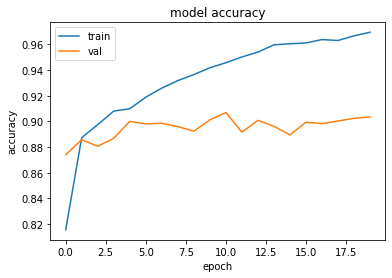

In [ ]:
# list all data in history
print(history_10.history.keys()) 
# summarize history for accuracy
plt.plot(history_10.history['accuracy'])
plt.plot(history_10.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Model 11

In [115]:
#create model
model_11 = Sequential()
#add model layers
model_11.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=input_shape))
model_11.add(Conv2D(64, kernel_size=3, activation='relu'))
model_11.add(MaxPooling2D(pool_size=(2,2)))
model_11.add(Conv2D(128, kernel_size=3, activation='relu'))
model_11.add(Flatten())
model_11.add(Dense(32,activation='relu'))
model_11.add(Dense(16,activation='relu'))
#model_8.add(Dropout(0.5)) #to avoid overfitting
model_11.add(Dense(num_classes, activation='softmax'))

#compile the model
model_11.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_11.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_34 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 12, 12, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 10, 10, 128)       73856     
                                                                 
 flatten_11 (Flatten)        (None, 12800)             0         
                                                                 
 dense_103 (Dense)           (None, 32)                409632    
                                                     

In [116]:
#train the model
history_11 = model_11.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=n_epochs)

Epoch 1/20
1500/1500 [==============================] - 8s 5ms/step - loss: 1.2703 - accuracy: 0.5084 - val_loss: 0.6962 - val_accuracy: 0.7437
Epoch 2/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4979 - accuracy: 0.8138 - val_loss: 0.4263 - val_accuracy: 0.8439
Epoch 3/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3624 - accuracy: 0.8724 - val_loss: 0.3609 - val_accuracy: 0.8736
Epoch 4/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3016 - accuracy: 0.8921 - val_loss: 0.3463 - val_accuracy: 0.8791
Epoch 5/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2616 - accuracy: 0.9066 - val_loss: 0.3250 - val_accuracy: 0.8864
Epoch 6/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2319 - accuracy: 0.9146 - val_loss: 0.2826 - val_accuracy: 0.9012
Epoch 7/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2020 - accuracy: 0.9261 - val_loss: 0.2879 - val_accuracy:

# Evaluation of Model 11

In [117]:
#Loss function: Categorical Cross Entropy
cross_entropy_11 = model_11.evaluate(X_test,y_test,verbose=0)
cross_entropy_11

[0.5160800814628601, 0.8998000025749207]

In [118]:
test_predictions_11 = model_11.predict(X_test)
y_predicted_11 = []
for i in range(10000):
  y_predicted_11.append(np.argmax(test_predictions_11[i]))
y_true = []
for i in range(10000):
  y_true.append(np.argmax(y_test[i]))

print(classification_report(y_true, y_predicted_11))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1000
           1       0.97      0.98      0.97      1000
           2       0.86      0.87      0.86      1000
           3       0.90      0.89      0.89      1000
           4       0.82      0.88      0.84      1000
           5       0.95      0.99      0.97      1000
           6       0.72      0.73      0.73      1000
           7       0.95      0.95      0.95      1000
           8       0.99      0.97      0.98      1000
           9       0.97      0.94      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


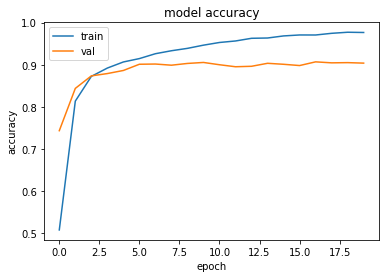

In [119]:
# list all data in history
print(history_11.history.keys()) 
# summarize history for accuracy
plt.plot(history_11.history['accuracy'])
plt.plot(history_11.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Confusion Matrix (reference: https://stackoverflow.com/questions/65618137/confusion-matrix-for-multiple-classes-in-python)

Text(0.5, 1.0, 'Confusion Matrix')

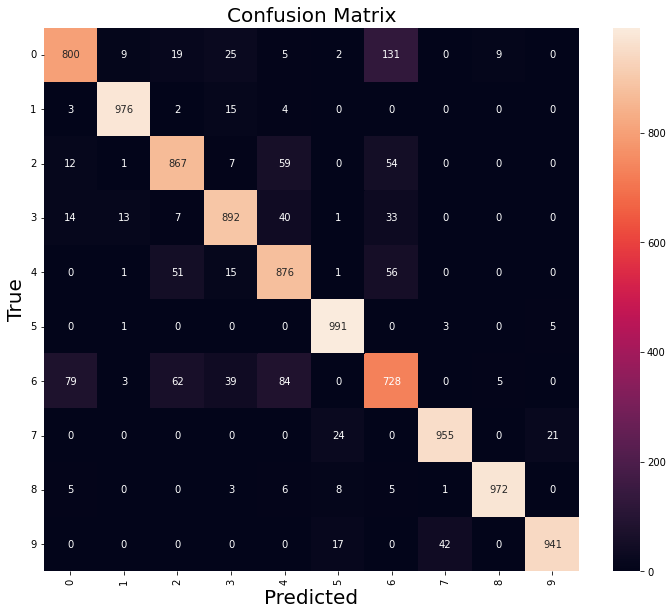

In [120]:
cm = confusion_matrix(y_true, y_predicted_11)
# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(12, 10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.tick_bottom()
ax.set_ylabel('True', fontsize=20)
plt.yticks(rotation=0)

plt.title('Confusion Matrix', fontsize=20)

# Model 12

In [121]:
#create model
model_12 = Sequential()
#add model layers
model_12.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=input_shape))
model_12.add(Conv2D(64, kernel_size=3, activation='relu'))
model_12.add(MaxPooling2D(pool_size=(2,2)))
model_12.add(Conv2D(128, kernel_size=3, activation='relu'))
model_12.add(Flatten())
model_12.add(Dense(64,activation='relu'))
model_12.add(Dense(32,activation='relu'))
model_12.add(Dense(16,activation='relu'))
#model_8.add(Dropout(0.5)) #to avoid overfitting
model_12.add(Dense(num_classes, activation='softmax'))

#compile the model
model_12.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_12.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_37 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 12, 12, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 10, 10, 128)       73856     
                                                                 
 flatten_12 (Flatten)        (None, 12800)             0         
                                                                 
 dense_106 (Dense)           (None, 64)                819264    
                                                     

In [122]:
#train the model
history_12 = model_12.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=n_epochs)

Epoch 1/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5588 - accuracy: 0.8231 - val_loss: 0.3462 - val_accuracy: 0.8770
Epoch 2/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3068 - accuracy: 0.8904 - val_loss: 0.2879 - val_accuracy: 0.8977
Epoch 3/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2566 - accuracy: 0.9067 - val_loss: 0.2873 - val_accuracy: 0.8954
Epoch 4/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2229 - accuracy: 0.9193 - val_loss: 0.2701 - val_accuracy: 0.9019
Epoch 5/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1974 - accuracy: 0.9293 - val_loss: 0.2789 - val_accuracy: 0.9026
Epoch 6/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1712 - accuracy: 0.9372 - val_loss: 0.2773 - val_accuracy: 0.9078
Epoch 7/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1471 - accuracy: 0.9463 - val_loss: 0.2784 - val_accuracy:

# Evaluation of Model 12

In [123]:
#Loss function: Categorical Cross Entropy
cross_entropy_12 = model_12.evaluate(X_test,y_test,verbose=0)
cross_entropy_12

[0.5140371322631836, 0.9032999873161316]

In [124]:
test_predictions_12 = model_12.predict(X_test)
y_predicted_12 = []
for i in range(10000):
  y_predicted_12.append(np.argmax(test_predictions_12[i]))
y_true = []
for i in range(10000):
  y_true.append(np.argmax(y_test[i]))

print(classification_report(y_true, y_predicted_12))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1000
           1       1.00      0.97      0.98      1000
           2       0.82      0.88      0.84      1000
           3       0.88      0.91      0.90      1000
           4       0.85      0.84      0.84      1000
           5       0.98      0.98      0.98      1000
           6       0.73      0.72      0.73      1000
           7       0.96      0.97      0.96      1000
           8       0.99      0.97      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


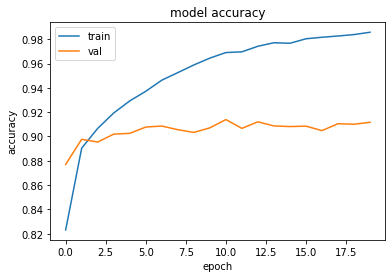

In [125]:
# list all data in history
print(history_12.history.keys()) 
# summarize history for accuracy
plt.plot(history_12.history['accuracy'])
plt.plot(history_12.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Confusion Matrix (reference: https://stackoverflow.com/questions/65618137/confusion-matrix-for-multiple-classes-in-python)

Text(0.5, 1.0, 'Confusion Matrix')

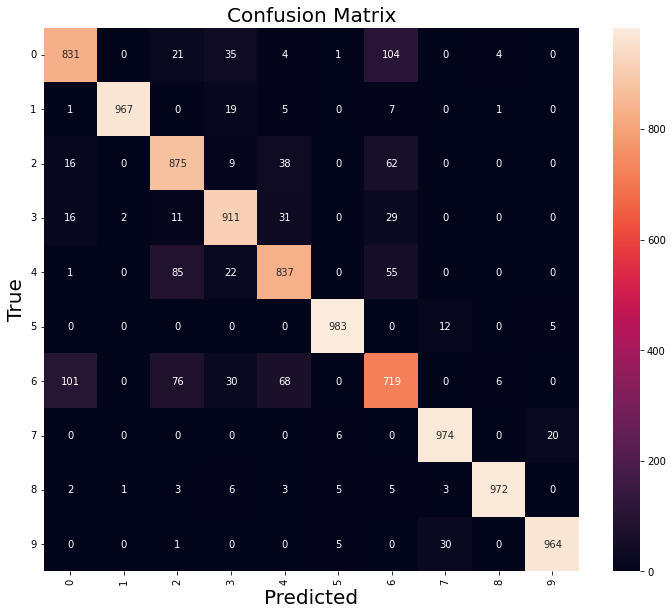

In [126]:
cm = confusion_matrix(y_true, y_predicted_12)
# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(12, 10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.tick_bottom()
ax.set_ylabel('True', fontsize=20)
plt.yticks(rotation=0)

plt.title('Confusion Matrix', fontsize=20)

# Model 13

In [127]:
#create model
model_13 = Sequential()
#add model layers
model_13.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=input_shape))
model_13.add(Conv2D(64, kernel_size=3, activation='relu'))
model_13.add(MaxPooling2D(pool_size=(2,2)))
model_13.add(Conv2D(128, kernel_size=3, activation='relu'))
model_13.add(Flatten())
model_13.add(Dense(64,activation='relu'))
model_13.add(Dense(32,activation='relu'))
model_13.add(Dense(16,activation='relu'))
#model_8.add(Dropout(0.5)) #to avoid overfitting
model_13.add(Dense(num_classes, activation='softmax'))

#compile the model
model_13.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_13.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_40 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 12, 12, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 10, 10, 128)       73856     
                                                                 
 flatten_13 (Flatten)        (None, 12800)             0         
                                                                 
 dense_110 (Dense)           (None, 64)                819264    
                                                     

In [128]:
#train the model
history_13 = model_13.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=n_epochs,batch_size=64)

Epoch 1/20
750/750 [==============================] - 6s 7ms/step - loss: 0.6591 - accuracy: 0.8121 - val_loss: 0.3469 - val_accuracy: 0.8759
Epoch 2/20
750/750 [==============================] - 5s 7ms/step - loss: 0.3138 - accuracy: 0.8881 - val_loss: 0.3137 - val_accuracy: 0.8895
Epoch 3/20
750/750 [==============================] - 5s 6ms/step - loss: 0.2620 - accuracy: 0.9065 - val_loss: 0.2866 - val_accuracy: 0.8997
Epoch 4/20
750/750 [==============================] - 5s 7ms/step - loss: 0.2313 - accuracy: 0.9159 - val_loss: 0.2804 - val_accuracy: 0.9018
Epoch 5/20
750/750 [==============================] - 5s 6ms/step - loss: 0.2060 - accuracy: 0.9245 - val_loss: 0.2903 - val_accuracy: 0.9013
Epoch 6/20
750/750 [==============================] - 5s 7ms/step - loss: 0.1829 - accuracy: 0.9336 - val_loss: 0.3290 - val_accuracy: 0.8892
Epoch 7/20
750/750 [==============================] - 5s 6ms/step - loss: 0.1672 - accuracy: 0.9382 - val_loss: 0.2975 - val_accuracy: 0.9038
Epoch 

# Evaluation of Model 13

In [129]:
#Loss function: Categorical Cross Entropy
cross_entropy_13 = model_13.evaluate(X_test,y_test,verbose=0)
cross_entropy_13

[0.48414915800094604, 0.9057000279426575]

In [130]:
test_predictions_13 = model_13.predict(X_test)
y_predicted_13 = []
for i in range(10000):
  y_predicted_13.append(np.argmax(test_predictions_13[i]))
y_true = []
for i in range(10000):
  y_true.append(np.argmax(y_test[i]))

print(classification_report(y_true, y_predicted_13))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1000
           1       0.99      0.98      0.99      1000
           2       0.89      0.85      0.87      1000
           3       0.90      0.90      0.90      1000
           4       0.84      0.87      0.86      1000
           5       0.99      0.97      0.98      1000
           6       0.71      0.74      0.73      1000
           7       0.94      0.98      0.96      1000
           8       0.98      0.97      0.97      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


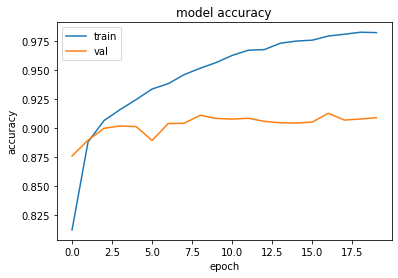

In [131]:
# list all data in history
print(history_13.history.keys()) 
# summarize history for accuracy
plt.plot(history_13.history['accuracy'])
plt.plot(history_13.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Confusion Matrix (reference: https://stackoverflow.com/questions/65618137/confusion-matrix-for-multiple-classes-in-python)

Text(0.5, 1.0, 'Confusion Matrix')

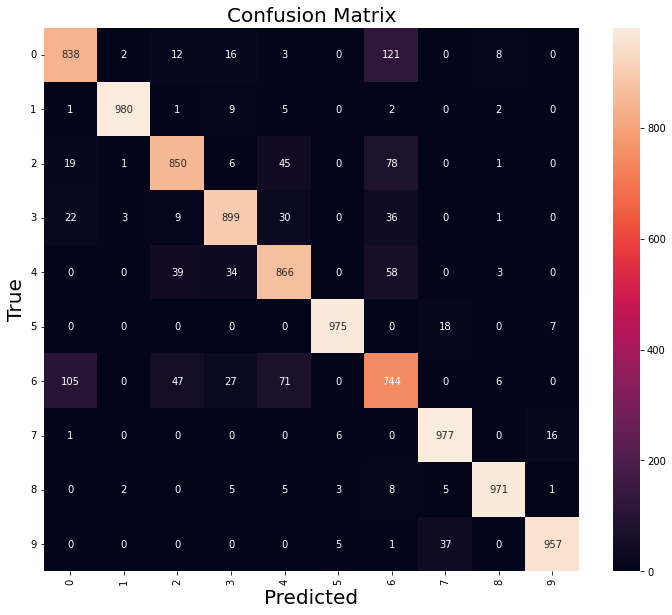

In [132]:
cm = confusion_matrix(y_true, y_predicted_13)
# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(12, 10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.tick_bottom()
ax.set_ylabel('True', fontsize=20)
plt.yticks(rotation=0)

plt.title('Confusion Matrix', fontsize=20)

# Model 14

In [109]:
#create model
model_14 = Sequential()
#add model layers
model_14.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=input_shape))
model_14.add(MaxPooling2D(pool_size=(2,2)))
model_14.add(Conv2D(64, kernel_size=3, activation='relu'))
model_14.add(MaxPooling2D(pool_size=(2,2)))
model_14.add(Conv2D(128, kernel_size=3, activation='relu'))
model_14.add(Flatten())
model_14.add(Dense(64,activation='relu'))
model_14.add(Dense(32,activation='relu'))
model_14.add(Dense(16,activation='relu'))
#model_8.add(Dropout(0.5)) #to avoid overfitting
model_14.add(Dense(num_classes, activation='softmax'))

#compile the model
model_14.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_14.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 3, 3, 128)         73856     
                                                                 
 flatten_10 (Flatten)        (None, 1152)            

In [110]:
#train the model
history_14 = model_14.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=n_epochs,batch_size=64)

Epoch 1/20
750/750 [==============================] - 4s 5ms/step - loss: 0.7414 - accuracy: 0.7488 - val_loss: 0.4559 - val_accuracy: 0.8420
Epoch 2/20
750/750 [==============================] - 3s 4ms/step - loss: 0.3838 - accuracy: 0.8660 - val_loss: 0.3690 - val_accuracy: 0.8683
Epoch 3/20
750/750 [==============================] - 3s 5ms/step - loss: 0.3231 - accuracy: 0.8842 - val_loss: 0.3484 - val_accuracy: 0.8727
Epoch 4/20
750/750 [==============================] - 3s 5ms/step - loss: 0.2880 - accuracy: 0.8968 - val_loss: 0.3226 - val_accuracy: 0.8866
Epoch 5/20
750/750 [==============================] - 3s 5ms/step - loss: 0.2635 - accuracy: 0.9034 - val_loss: 0.3244 - val_accuracy: 0.8861
Epoch 6/20
750/750 [==============================] - 4s 5ms/step - loss: 0.2405 - accuracy: 0.9117 - val_loss: 0.3100 - val_accuracy: 0.8926
Epoch 7/20
750/750 [==============================] - 4s 5ms/step - loss: 0.2254 - accuracy: 0.9174 - val_loss: 0.2982 - val_accuracy: 0.8937
Epoch 

# Evaluation of Model 14

In [111]:
#Loss function: Categorical Cross Entropy
cross_entropy_14 = model_14.evaluate(X_test,y_test,verbose=0)
cross_entropy_14

[0.43508201837539673, 0.8960000276565552]

In [112]:
test_predictions_14 = model_14.predict(X_test)
y_predicted_14 = []
for i in range(10000):
  y_predicted_14.append(np.argmax(test_predictions_14[i]))
y_true = []
for i in range(10000):
  y_true.append(np.argmax(y_test[i]))

print(classification_report(y_true, y_predicted_14))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.82      0.85      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.83      0.84      0.84      1000
           3       0.92      0.89      0.91      1000
           4       0.83      0.81      0.82      1000
           5       0.98      0.98      0.98      1000
           6       0.70      0.71      0.71      1000
           7       0.97      0.95      0.96      1000
           8       0.97      0.97      0.97      1000
           9       0.95      0.98      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


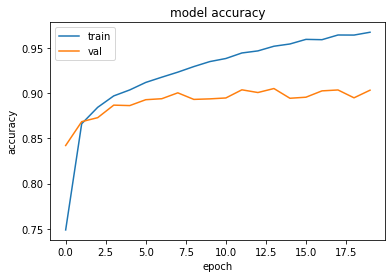

In [113]:
# list all data in history
print(history_14.history.keys()) 
# summarize history for accuracy
plt.plot(history_14.history['accuracy'])
plt.plot(history_14.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Confusion Matrix (reference: https://stackoverflow.com/questions/65618137/confusion-matrix-for-multiple-classes-in-python)

Text(0.5, 1.0, 'Confusion Matrix')

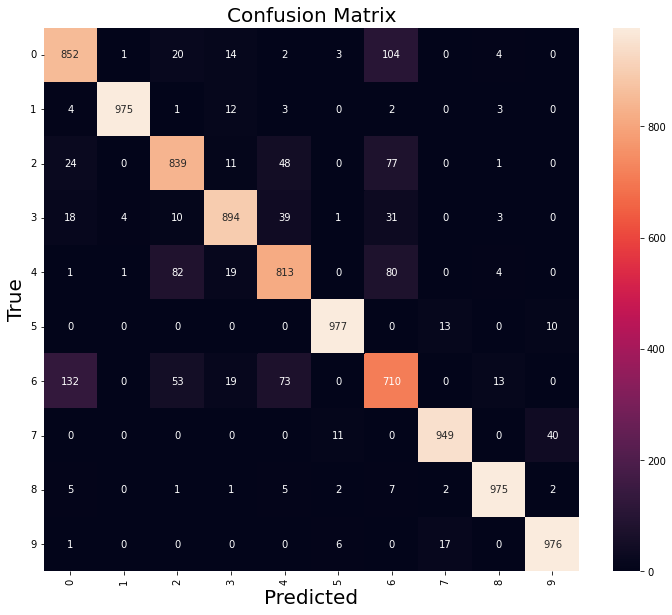

In [114]:
cm = confusion_matrix(y_true, y_predicted_14)
# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(12, 10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.tick_bottom()
ax.set_ylabel('True', fontsize=20)
plt.yticks(rotation=0)

plt.title('Confusion Matrix', fontsize=20)

# Model 15

In [133]:
#create model
model_15 = Sequential()
#add model layers
model_15.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=input_shape))
model_15.add(MaxPooling2D(pool_size=(2,2)))
model_15.add(Conv2D(64, kernel_size=3, activation='relu'))
model_15.add(Conv2D(128, kernel_size=3, activation='relu'))
model_15.add(Flatten())
model_15.add(Dense(64,activation='relu'))
model_15.add(Dense(32,activation='relu'))
model_15.add(Dense(16,activation='relu'))
#model_8.add(Dropout(0.5)) #to avoid overfitting
model_15.add(Dense(num_classes, activation='softmax'))

#compile the model
model_15.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_15.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 conv2d_44 (Conv2D)          (None, 9, 9, 128)         73856     
                                                                 
 flatten_14 (Flatten)        (None, 10368)             0         
                                                                 
 dense_114 (Dense)           (None, 64)                663616    
                                                     

In [134]:
#train the model
history_15 = model_15.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=n_epochs,batch_size=64)

Epoch 1/20
750/750 [==============================] - 4s 5ms/step - loss: 0.8666 - accuracy: 0.7851 - val_loss: 0.4749 - val_accuracy: 0.8423
Epoch 2/20
750/750 [==============================] - 4s 5ms/step - loss: 0.3620 - accuracy: 0.8759 - val_loss: 0.3906 - val_accuracy: 0.8636
Epoch 3/20
750/750 [==============================] - 4s 5ms/step - loss: 0.2952 - accuracy: 0.8949 - val_loss: 0.3055 - val_accuracy: 0.8949
Epoch 4/20
750/750 [==============================] - 4s 5ms/step - loss: 0.2612 - accuracy: 0.9066 - val_loss: 0.2986 - val_accuracy: 0.8934
Epoch 5/20
750/750 [==============================] - 4s 5ms/step - loss: 0.2347 - accuracy: 0.9141 - val_loss: 0.3294 - val_accuracy: 0.8819
Epoch 6/20
750/750 [==============================] - 4s 6ms/step - loss: 0.2139 - accuracy: 0.9213 - val_loss: 0.2894 - val_accuracy: 0.9008
Epoch 7/20
750/750 [==============================] - 4s 6ms/step - loss: 0.1971 - accuracy: 0.9272 - val_loss: 0.2855 - val_accuracy: 0.9017
Epoch 

# Evaluation of Model 15

In [135]:
#Loss function: Categorical Cross Entropy
cross_entropy_15 = model_15.evaluate(X_test,y_test,verbose=0)
cross_entropy_15

[0.4917256832122803, 0.8960000276565552]

In [136]:
test_predictions_15 = model_15.predict(X_test)
y_predicted_15 = []
for i in range(10000):
  y_predicted_15.append(np.argmax(test_predictions_15[i]))
y_true = []
for i in range(10000):
  y_true.append(np.argmax(y_test[i]))

print(classification_report(y_true, y_predicted_15))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1000
           1       0.99      0.98      0.98      1000
           2       0.85      0.82      0.83      1000
           3       0.90      0.90      0.90      1000
           4       0.80      0.89      0.85      1000
           5       0.98      0.96      0.97      1000
           6       0.71      0.70      0.70      1000
           7       0.95      0.95      0.95      1000
           8       0.97      0.98      0.97      1000
           9       0.95      0.97      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


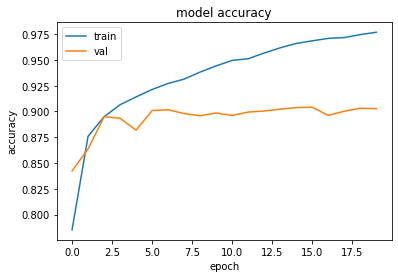

In [137]:
# list all data in history
print(history_15.history.keys()) 
# summarize history for accuracy
plt.plot(history_15.history['accuracy'])
plt.plot(history_15.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Confusion Matrix (reference: https://stackoverflow.com/questions/65618137/confusion-matrix-for-multiple-classes-in-python)

Text(0.5, 1.0, 'Confusion Matrix')

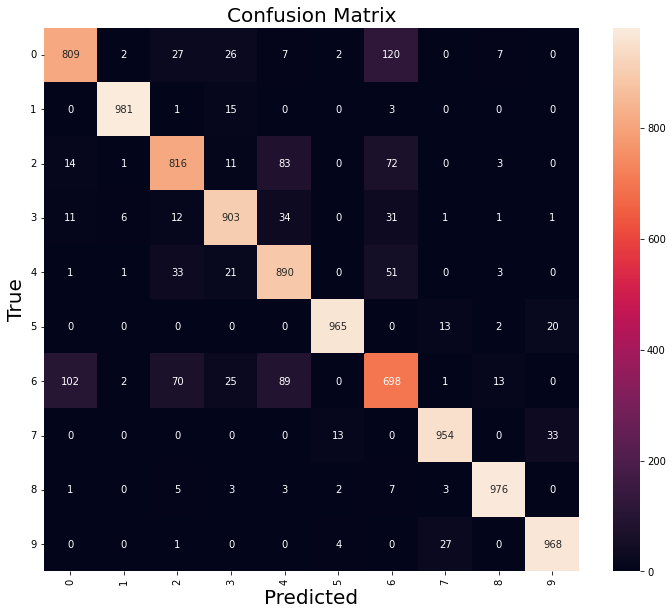

In [138]:
cm = confusion_matrix(y_true, y_predicted_15)
# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(12, 10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.tick_bottom()
ax.set_ylabel('True', fontsize=20)
plt.yticks(rotation=0)

plt.title('Confusion Matrix', fontsize=20)

# Model 16

In [ ]:
#create model
model_16 = Sequential()
#add model layers
model_16.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=input_shape))
model_16.add(MaxPooling2D(pool_size=(2,2)))
model_16.add(Conv2D(64, kernel_size=3, activation='relu'))
model_16.add(Conv2D(128, kernel_size=3, activation='relu'))
model_16.add(Flatten())
model_16.add(Dense(64,activation='relu'))
model_16.add(Dense(32,activation='relu'))
model_16.add(Dense(16,activation='relu'))
#model_8.add(Dropout(0.5)) #to avoid overfitting
model_16.add(Dense(num_classes, activation='softmax'))

#compile the model
model_16.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_16.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 conv2d_42 (Conv2D)          (None, 9, 9, 128)         73856     
                                                                 
 flatten_15 (Flatten)        (None, 10368)             0         
                                                                 
 dense_50 (Dense)            (None, 64)                663616    
                                                     

In [ ]:
#train the model
history_16 = model_16.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=n_epochs,batch_size=128)

Epoch 1/20
375/375 [==============================] - 4s 8ms/step - loss: 1.1165 - accuracy: 0.7023 - val_loss: 0.4468 - val_accuracy: 0.8432
Epoch 2/20
375/375 [==============================] - 3s 7ms/step - loss: 0.3749 - accuracy: 0.8678 - val_loss: 0.3774 - val_accuracy: 0.8687
Epoch 3/20
375/375 [==============================] - 3s 7ms/step - loss: 0.3042 - accuracy: 0.8921 - val_loss: 0.3132 - val_accuracy: 0.8892
Epoch 4/20
375/375 [==============================] - 3s 7ms/step - loss: 0.2630 - accuracy: 0.9048 - val_loss: 0.2954 - val_accuracy: 0.8961
Epoch 5/20
375/375 [==============================] - 3s 7ms/step - loss: 0.2379 - accuracy: 0.9134 - val_loss: 0.3130 - val_accuracy: 0.8916
Epoch 6/20
375/375 [==============================] - 3s 7ms/step - loss: 0.2135 - accuracy: 0.9222 - val_loss: 0.2874 - val_accuracy: 0.9013
Epoch 7/20
375/375 [==============================] - 3s 7ms/step - loss: 0.1902 - accuracy: 0.9308 - val_loss: 0.2873 - val_accuracy: 0.8983
Epoch 

# Evaluation of Model 16

In [ ]:
#Loss function: Categorical Cross Entropy
cross_entropy_16 = model_16.evaluate(X_test,y_test,verbose=0)
cross_entropy_16

[0.4539831578731537, 0.9014000296592712]

In [ ]:
test_predictions_16 = model_16.predict(X_test)
y_predicted_16 = []
for i in range(10000):
  y_predicted_16.append(np.argmax(test_predictions_16[i]))
y_true = []
for i in range(10000):
  y_true.append(np.argmax(y_test[i]))

print(classification_report(y_true, y_predicted_16))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.83      0.86      0.84      1000
           3       0.91      0.90      0.90      1000
           4       0.86      0.82      0.84      1000
           5       0.98      0.98      0.98      1000
           6       0.72      0.71      0.71      1000
           7       0.95      0.96      0.96      1000
           8       0.98      0.97      0.98      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


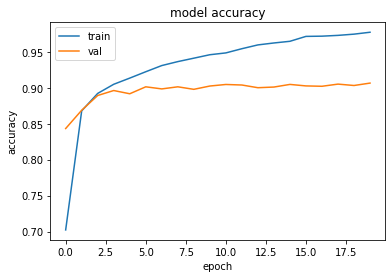

In [ ]:
# list all data in history
print(history_16.history.keys()) 
# summarize history for accuracy
plt.plot(history_16.history['accuracy'])
plt.plot(history_16.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Model 17

In [ ]:
#create model
model_17 = Sequential()
#add model layers
model_17.add(Conv2D(16, kernel_size=3, activation='relu', input_shape=input_shape))
model_17.add(Conv2D(32, kernel_size=3, activation='relu'))
model_17.add(MaxPooling2D(pool_size=(2,2)))
model_17.add(Conv2D(64, kernel_size=3, activation='relu'))
model_17.add(Conv2D(128, kernel_size=3, activation='relu'))
model_17.add(Flatten())
model_17.add(Dense(64,activation='relu'))
model_17.add(Dense(32,activation='relu'))
model_17.add(Dense(16,activation='relu'))
#model_8.add(Dropout(0.5)) #to avoid overfitting
model_17.add(Dense(num_classes, activation='softmax'))

#compile the model
model_17.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_17.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_43 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 conv2d_44 (Conv2D)          (None, 24, 24, 32)        4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_45 (Conv2D)          (None, 10, 10, 64)        18496     
                                                                 
 conv2d_46 (Conv2D)          (None, 8, 8, 128)         73856     
                                                                 
 flatten_16 (Flatten)        (None, 8192)              0         
                                                     

In [ ]:
#train the model
history_17 = model_17.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=n_epochs,batch_size=128)

Epoch 1/20
375/375 [==============================] - 4s 8ms/step - loss: 0.7463 - accuracy: 0.7704 - val_loss: 0.3971 - val_accuracy: 0.8638
Epoch 2/20
375/375 [==============================] - 3s 8ms/step - loss: 0.3361 - accuracy: 0.8813 - val_loss: 0.3227 - val_accuracy: 0.8866
Epoch 3/20
375/375 [==============================] - 3s 7ms/step - loss: 0.2682 - accuracy: 0.9049 - val_loss: 0.2976 - val_accuracy: 0.8966
Epoch 4/20
375/375 [==============================] - 3s 8ms/step - loss: 0.2277 - accuracy: 0.9179 - val_loss: 0.2872 - val_accuracy: 0.9009
Epoch 5/20
375/375 [==============================] - 3s 7ms/step - loss: 0.1981 - accuracy: 0.9291 - val_loss: 0.2821 - val_accuracy: 0.9053
Epoch 6/20
375/375 [==============================] - 3s 8ms/step - loss: 0.1732 - accuracy: 0.9369 - val_loss: 0.2794 - val_accuracy: 0.9060
Epoch 7/20
375/375 [==============================] - 3s 8ms/step - loss: 0.1521 - accuracy: 0.9446 - val_loss: 0.2936 - val_accuracy: 0.9079
Epoch 

# Evaluation of Model 17

In [ ]:
#Loss function: Categorical Cross Entropy
cross_entropy_17 = model_17.evaluate(X_test,y_test,verbose=0)
cross_entropy_17

[0.5084830522537231, 0.9023000001907349]

In [ ]:
test_predictions_17 = model_17.predict(X_test)
y_predicted_17 = []
for i in range(10000):
  y_predicted_17.append(np.argmax(test_predictions_17[i]))
y_true = []
for i in range(10000):
  y_true.append(np.argmax(y_test[i]))

print(classification_report(y_true, y_predicted_17))

313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.80      0.87      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.82      0.90      0.86      1000
           3       0.93      0.88      0.90      1000
           4       0.89      0.84      0.86      1000
           5       0.99      0.95      0.97      1000
           6       0.75      0.70      0.72      1000
           7       0.94      0.97      0.95      1000
           8       0.97      0.97      0.97      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


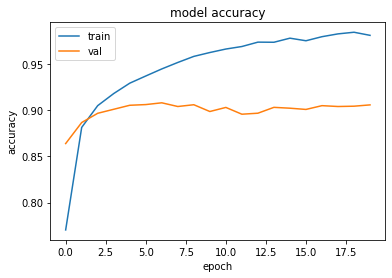

In [ ]:
# list all data in history
print(history_17.history.keys()) 
# summarize history for accuracy
plt.plot(history_17.history['accuracy'])
plt.plot(history_17.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Model 18

In [ ]:
#create model
model_18 = Sequential()
#add model layers
model_18.add(Conv2D(16, kernel_size=3, activation='relu', input_shape=input_shape))
model_18.add(Conv2D(32, kernel_size=3, activation='relu'))
model_18.add(Conv2D(64, kernel_size=3, activation='relu'))
model_18.add(Conv2D(128, kernel_size=3, activation='relu'))
model_18.add(Flatten())
model_18.add(Dense(64,activation='relu'))
model_18.add(Dense(32,activation='relu'))
model_18.add(Dense(16,activation='relu'))
#model_8.add(Dropout(0.5)) #to avoid overfitting
model_18.add(Dense(num_classes, activation='softmax'))

#compile the model
model_18.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_18.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_47 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 conv2d_48 (Conv2D)          (None, 24, 24, 32)        4640      
                                                                 
 conv2d_49 (Conv2D)          (None, 22, 22, 64)        18496     
                                                                 
 conv2d_50 (Conv2D)          (None, 20, 20, 128)       73856     
                                                                 
 flatten_17 (Flatten)        (None, 51200)             0         
                                                                 
 dense_58 (Dense)            (None, 64)                3276864   
                                                                 
 dense_59 (Dense)            (None, 32)              

In [ ]:
#train the model
history_18 = model_18.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=n_epochs,batch_size=128)

Epoch 1/20
375/375 [==============================] - 9s 20ms/step - loss: 1.0004 - accuracy: 0.7367 - val_loss: 0.4852 - val_accuracy: 0.8381
Epoch 2/20
375/375 [==============================] - 6s 17ms/step - loss: 0.3987 - accuracy: 0.8619 - val_loss: 0.3900 - val_accuracy: 0.8685
Epoch 3/20
375/375 [==============================] - 6s 16ms/step - loss: 0.3150 - accuracy: 0.8898 - val_loss: 0.3509 - val_accuracy: 0.8809
Epoch 4/20
375/375 [==============================] - 6s 16ms/step - loss: 0.2599 - accuracy: 0.9075 - val_loss: 0.3086 - val_accuracy: 0.8923
Epoch 5/20
375/375 [==============================] - 6s 16ms/step - loss: 0.2181 - accuracy: 0.9211 - val_loss: 0.2898 - val_accuracy: 0.8994
Epoch 6/20
375/375 [==============================] - 6s 16ms/step - loss: 0.1871 - accuracy: 0.9324 - val_loss: 0.3030 - val_accuracy: 0.9001
Epoch 7/20
375/375 [==============================] - 6s 16ms/step - loss: 0.1534 - accuracy: 0.9442 - val_loss: 0.3565 - val_accuracy: 0.8921

# Evaluation of Model 18

In [ ]:
#Loss function: Categorical Cross Entropy
cross_entropy_18 = model_18.evaluate(X_test,y_test,verbose=0)
cross_entropy_18

[0.6354302763938904, 0.8934999704360962]

In [ ]:
test_predictions_18 = model_18.predict(X_test)
y_predicted_18 = []
for i in range(10000):
  y_predicted_18.append(np.argmax(test_predictions_18[i]))
y_true = []
for i in range(10000):
  y_true.append(np.argmax(y_test[i]))

print(classification_report(y_true, y_predicted_18))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.79      0.87      0.83      1000
           3       0.89      0.87      0.88      1000
           4       0.87      0.79      0.83      1000
           5       0.97      0.99      0.98      1000
           6       0.70      0.72      0.71      1000
           7       0.97      0.95      0.96      1000
           8       0.96      0.97      0.96      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


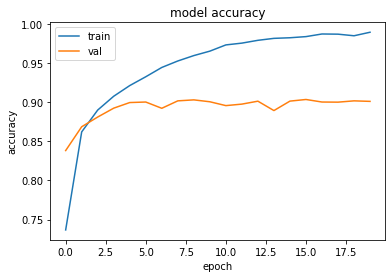

In [ ]:
# list all data in history
print(history_18.history.keys()) 
# summarize history for accuracy
plt.plot(history_18.history['accuracy'])
plt.plot(history_18.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Model 19

In [ ]:
#create model
model_19 = Sequential()
#add model layers
model_19.add(Conv2D(16, kernel_size=3, activation='relu', input_shape=input_shape))
model_19.add(Conv2D(32, kernel_size=3, activation='relu'))
model_19.add(Conv2D(64, kernel_size=3, activation='relu'))
model_19.add(Conv2D(128, kernel_size=3, activation='relu'))
model_19.add(MaxPooling2D(pool_size=(2,2)))
model_19.add(Flatten())
model_19.add(Dense(64,activation='relu'))
model_19.add(Dense(32,activation='relu'))
model_19.add(Dense(16,activation='relu'))
#model_8.add(Dropout(0.5)) #to avoid overfitting
model_19.add(Dense(num_classes, activation='softmax'))

#compile the model
model_19.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_19.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_51 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 conv2d_52 (Conv2D)          (None, 24, 24, 32)        4640      
                                                                 
 conv2d_53 (Conv2D)          (None, 22, 22, 64)        18496     
                                                                 
 conv2d_54 (Conv2D)          (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 10, 10, 128)      0         
 g2D)                                                            
                                                                 
 flatten_18 (Flatten)        (None, 12800)             0         
                                                     

In [ ]:
#train the model
history_19 = model_19.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=n_epochs,batch_size=32)

Epoch 1/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5554 - accuracy: 0.8163 - val_loss: 0.3842 - val_accuracy: 0.8651
Epoch 2/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3118 - accuracy: 0.8887 - val_loss: 0.2938 - val_accuracy: 0.8964
Epoch 3/20
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2580 - accuracy: 0.9077 - val_loss: 0.2774 - val_accuracy: 0.9005
Epoch 4/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2242 - accuracy: 0.9197 - val_loss: 0.2679 - val_accuracy: 0.9069
Epoch 5/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1890 - accuracy: 0.9298 - val_loss: 0.3053 - val_accuracy: 0.9027
Epoch 6/20
1500/1500 [==============================] - 10s 6ms/step - loss: 0.1653 - accuracy: 0.9394 - val_loss: 0.3080 - val_accuracy: 0.9027
Epoch 7/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1454 - accuracy: 0.9474 - val_loss: 0.2895 - val_acc

# Evaluation of Model 19

In [ ]:
#Loss function: Categorical Cross Entropy
cross_entropy_19 = model_19.evaluate(X_test,y_test,verbose=0)
cross_entropy_19

[0.5543770790100098, 0.8980000019073486]

In [ ]:
test_predictions_19 = model_19.predict(X_test)
y_predicted_19 = []
for i in range(10000):
  y_predicted_19.append(np.argmax(test_predictions_19[i]))
y_true = []
for i in range(10000):
  y_true.append(np.argmax(y_test[i]))

print(classification_report(y_true, y_predicted_19))

313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1000
           1       1.00      0.96      0.98      1000
           2       0.79      0.90      0.84      1000
           3       0.93      0.87      0.90      1000
           4       0.82      0.86      0.84      1000
           5       0.98      0.97      0.98      1000
           6       0.77      0.66      0.71      1000
           7       0.93      0.98      0.96      1000
           8       0.95      0.98      0.96      1000
           9       0.98      0.94      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


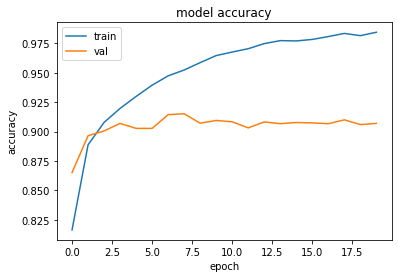

In [ ]:
# list all data in history
print(history_19.history.keys()) 
# summarize history for accuracy
plt.plot(history_19.history['accuracy'])
plt.plot(history_19.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Model 20

In [ ]:
#create model
model_20 = Sequential()
#add model layers
model_20.add(Conv2D(16, kernel_size=3, activation='relu', input_shape=input_shape))
model_20.add(Conv2D(32, kernel_size=3, activation='relu'))
model_20.add(Conv2D(64, kernel_size=3, activation='relu'))
model_20.add(MaxPooling2D(pool_size=(2,2)))
model_20.add(Conv2D(128, kernel_size=3, activation='relu'))
model_20.add(Flatten())
model_20.add(Dense(64,activation='relu'))
model_20.add(Dense(32,activation='relu'))
model_20.add(Dense(16,activation='relu'))
#model_8.add(Dropout(0.5)) #to avoid overfitting
model_20.add(Dense(num_classes, activation='softmax'))

#compile the model
model_20.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_20.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_55 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 conv2d_56 (Conv2D)          (None, 24, 24, 32)        4640      
                                                                 
 conv2d_57 (Conv2D)          (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 11, 11, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_58 (Conv2D)          (None, 9, 9, 128)         73856     
                                                                 
 flatten_19 (Flatten)        (None, 10368)             0         
                                                     

In [ ]:
#train the model
history_20 = model_20.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=n_epochs,batch_size=32)

Epoch 1/20
1500/1500 [==============================] - 14s 9ms/step - loss: 0.5770 - accuracy: 0.8045 - val_loss: 0.3514 - val_accuracy: 0.8761
Epoch 2/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3168 - accuracy: 0.8868 - val_loss: 0.3644 - val_accuracy: 0.8663
Epoch 3/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2608 - accuracy: 0.9062 - val_loss: 0.2807 - val_accuracy: 0.9009
Epoch 4/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2267 - accuracy: 0.9180 - val_loss: 0.2918 - val_accuracy: 0.8981
Epoch 5/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2025 - accuracy: 0.9278 - val_loss: 0.2752 - val_accuracy: 0.9090
Epoch 6/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1818 - accuracy: 0.9354 - val_loss: 0.2868 - val_accuracy: 0.9033
Epoch 7/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.1607 - accuracy: 0.9419 - val_loss: 0.2721 - val_acc

# Evaluation of Model 20

In [ ]:
#Loss function: Categorical Cross Entropy
cross_entropy_20 = model_20.evaluate(X_test,y_test,verbose=0)
cross_entropy_20

[0.4571739733219147, 0.9043999910354614]

In [ ]:
test_predictions_20 = model_20.predict(X_test)
y_predicted_20 = []
for i in range(10000):
  y_predicted_20.append(np.argmax(test_predictions_20[i]))
y_true = []
for i in range(10000):
  y_true.append(np.argmax(y_test[i]))

print(classification_report(y_true, y_predicted_20))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.84      0.88      0.86      1000
           3       0.94      0.85      0.89      1000
           4       0.86      0.86      0.86      1000
           5       0.98      0.98      0.98      1000
           6       0.73      0.71      0.72      1000
           7       0.96      0.97      0.97      1000
           8       0.97      0.97      0.97      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


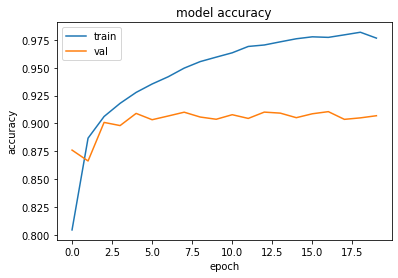

In [ ]:
# list all data in history
print(history_20.history.keys()) 
# summarize history for accuracy
plt.plot(history_20.history['accuracy'])
plt.plot(history_20.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Model 21

In [ ]:
#create model
model_21 = Sequential()
#add model layers
model_21.add(Conv2D(16, kernel_size=3, activation='relu', input_shape=input_shape))
model_21.add(Conv2D(32, kernel_size=3, activation='relu'))
model_21.add(Conv2D(32, kernel_size=3, activation='relu'))
model_21.add(Conv2D(64, kernel_size=3, activation='relu'))
model_21.add(MaxPooling2D(pool_size=(2,2)))
model_21.add(Conv2D(128, kernel_size=3, activation='relu'))
model_21.add(Flatten())
model_21.add(Dense(64,activation='relu'))
model_21.add(Dense(32,activation='relu'))
model_21.add(Dense(16,activation='relu'))
#model_8.add(Dropout(0.5)) #to avoid overfitting
model_21.add(Dense(num_classes, activation='softmax'))

#compile the model
model_21.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_21.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_59 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 conv2d_60 (Conv2D)          (None, 24, 24, 32)        4640      
                                                                 
 conv2d_61 (Conv2D)          (None, 22, 22, 32)        9248      
                                                                 
 conv2d_62 (Conv2D)          (None, 20, 20, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 10, 10, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_63 (Conv2D)          (None, 8, 8, 128)         73856     
                                                     

In [ ]:
#train the model
history_21 = model_21.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=n_epochs,batch_size=32)

Epoch 1/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.6959 - accuracy: 0.7628 - val_loss: 0.4492 - val_accuracy: 0.8453
Epoch 2/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3782 - accuracy: 0.8675 - val_loss: 0.3572 - val_accuracy: 0.8732
Epoch 3/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3046 - accuracy: 0.8917 - val_loss: 0.3159 - val_accuracy: 0.8901
Epoch 4/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2710 - accuracy: 0.9010 - val_loss: 0.3015 - val_accuracy: 0.8903
Epoch 5/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.2436 - accuracy: 0.9128 - val_loss: 0.3022 - val_accuracy: 0.8996
Epoch 6/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.2199 - accuracy: 0.9214 - val_loss: 0.2836 - val_accuracy: 0.9023
Epoch 7/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.1949 - accuracy: 0.9311 - val_loss: 0.2986 - val_accuracy:

# Evaluation of Model 21

In [ ]:
#Loss function: Categorical Cross Entropy
cross_entropy_21 = model_21.evaluate(X_test,y_test,verbose=0)
cross_entropy_21

[0.4298816919326782, 0.9035000205039978]

In [ ]:
test_predictions_21 = model_21.predict(X_test)
y_predicted_21 = []
for i in range(10000):
  y_predicted_21.append(np.argmax(test_predictions_21[i]))
y_true = []
for i in range(10000):
  y_true.append(np.argmax(y_test[i]))

print(classification_report(y_true, y_predicted_21))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.87      0.82      0.85      1000
           1       1.00      0.97      0.98      1000
           2       0.85      0.86      0.86      1000
           3       0.85      0.94      0.89      1000
           4       0.85      0.88      0.87      1000
           5       0.97      0.99      0.98      1000
           6       0.75      0.72      0.74      1000
           7       0.96      0.94      0.95      1000
           8       0.98      0.96      0.97      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


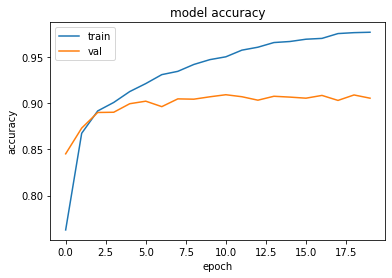

In [ ]:
# list all data in history
print(history_21.history.keys()) 
# summarize history for accuracy
plt.plot(history_21.history['accuracy'])
plt.plot(history_21.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Model 22

In [ ]:
#create model
model_22 = Sequential()
#add model layers
model_22.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=input_shape))
model_22.add(Conv2D(64, kernel_size=3, activation='relu'))
model_22.add(MaxPooling2D(pool_size=(2,2)))
model_22.add(Conv2D(128, kernel_size=3, activation='relu'))
model_22.add(Flatten())
model_22.add(Dense(32,activation='relu'))
model_22.add(Dense(16,activation='relu'))
model_22.add(Dropout(0.2)) #to avoid overfitting
model_22.add(Dense(num_classes, activation='softmax'))

#compile the model
model_22.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_22.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 128)       73856     
                                                                 
 flatten_1 (Flatten)         (None, 12800)             0         
                                                                 
 dense_18 (Dense)            (None, 32)                409632    
                                                      

In [23]:
#train the model
history_22 = model_22.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=n_epochs)

Epoch 1/20
1500/1500 [==============================] - 14s 5ms/step - loss: 1.5533 - accuracy: 0.4004 - val_loss: 1.0371 - val_accuracy: 0.5563
Epoch 2/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.7155 - accuracy: 0.7310 - val_loss: 0.4687 - val_accuracy: 0.8304
Epoch 3/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.4898 - accuracy: 0.8295 - val_loss: 0.3698 - val_accuracy: 0.8717
Epoch 4/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4062 - accuracy: 0.8607 - val_loss: 0.3332 - val_accuracy: 0.8851
Epoch 5/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3690 - accuracy: 0.8739 - val_loss: 0.3108 - val_accuracy: 0.8892
Epoch 6/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3278 - accuracy: 0.8882 - val_loss: 0.3304 - val_accuracy: 0.8884
Epoch 7/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2999 - accuracy: 0.8965 - val_loss: 0.3270 - val_accuracy

# Evaluation of Model 22

In [24]:
#Loss function: Categorical Cross Entropy
cross_entropy_22 = model_22.evaluate(X_test,y_test,verbose=0)
cross_entropy_22

[0.5853242874145508, 0.8723000288009644]

In [25]:
test_predictions_22 = model_22.predict(X_test)
y_predicted_22 = []
for i in range(10000):
  y_predicted_22.append(np.argmax(test_predictions_22[i]))
y_true = []
for i in range(10000):
  y_true.append(np.argmax(y_test[i]))

print(classification_report(y_true, y_predicted_22))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1000
           1       0.99      0.96      0.98      1000
           2       0.77      0.84      0.80      1000
           3       0.89      0.85      0.87      1000
           4       0.78      0.73      0.76      1000
           5       0.98      0.96      0.97      1000
           6       0.63      0.62      0.63      1000
           7       0.93      0.98      0.95      1000
           8       0.97      0.97      0.97      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


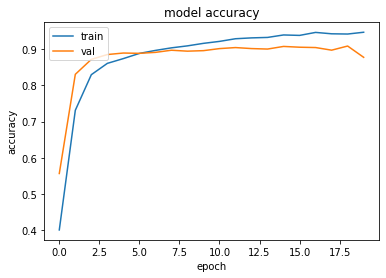

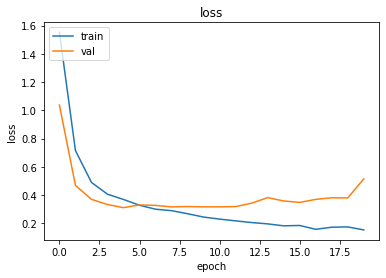

In [26]:
# list all data in history
print(history_22.history.keys()) 
# summarize history for accuracy
plt.plot(history_22.history['accuracy'])
plt.plot(history_22.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history_22.history['loss'])
plt.plot(history_22.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Model 22

In [32]:
#create model
model_22 = Sequential()
#add model layers
model_22.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=input_shape))
model_22.add(Conv2D(64, kernel_size=3, activation='relu'))
model_22.add(MaxPooling2D(pool_size=(2,2)))
model_22.add(Conv2D(128, kernel_size=3, activation='relu'))
model_22.add(Flatten())
model_22.add(Dense(32,activation='relu'))
model_22.add(Dense(16,activation='relu'))
model_22.add(Dropout(0.5)) #to avoid overfitting
model_22.add(Dense(num_classes, activation='softmax'))

#compile the model
model_22.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_22.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_10 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 10, 10, 128)       73856     
                                                                 
 flatten_3 (Flatten)         (None, 12800)             0         
                                                                 
 dense_24 (Dense)            (None, 32)                409632    
                                                      

In [33]:
#train the model
history_22 = model_22.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=n_epochs)

Epoch 1/20
1500/1500 [==============================] - 8s 5ms/step - loss: 1.4104 - accuracy: 0.4865 - val_loss: 0.6230 - val_accuracy: 0.8081
Epoch 2/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.8533 - accuracy: 0.7023 - val_loss: 0.4515 - val_accuracy: 0.8566
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.7223 - accuracy: 0.7525 - val_loss: 0.4212 - val_accuracy: 0.8717
Epoch 4/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.6580 - accuracy: 0.7735 - val_loss: 0.4705 - val_accuracy: 0.8557
Epoch 5/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.6173 - accuracy: 0.7926 - val_loss: 0.3894 - val_accuracy: 0.8800
Epoch 6/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5910 - accuracy: 0.8044 - val_loss: 0.3887 - val_accuracy: 0.8807
Epoch 7/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.5686 - accuracy: 0.8119 - val_loss: 0.3948 - val_accuracy:

In [34]:
#Loss function: Categorical Cross Entropy
cross_entropy_22 = model_22.evaluate(X_test,y_test,verbose=0)
cross_entropy_22

[0.534837543964386, 0.888700008392334]

In [35]:
test_predictions_22 = model_22.predict(X_test)
y_predicted_22 = []
for i in range(10000):
  y_predicted_22.append(np.argmax(test_predictions_22[i]))
y_true = []
for i in range(10000):
  y_true.append(np.argmax(y_test[i]))

print(classification_report(y_true, y_predicted_22))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1000
           1       0.99      0.98      0.98      1000
           2       0.83      0.80      0.82      1000
           3       0.93      0.86      0.89      1000
           4       0.77      0.89      0.82      1000
           5       0.99      0.97      0.98      1000
           6       0.73      0.64      0.68      1000
           7       0.92      0.99      0.95      1000
           8       0.97      0.97      0.97      1000
           9       0.99      0.93      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


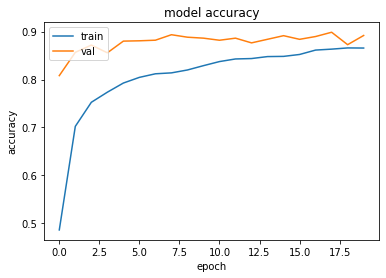

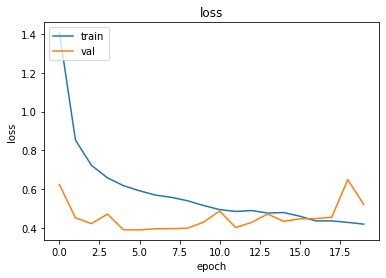

In [36]:
# list all data in history
print(history_22.history.keys()) 
# summarize history for accuracy
plt.plot(history_22.history['accuracy'])
plt.plot(history_22.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history_22.history['loss'])
plt.plot(history_22.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Import the data set

In [ ]:
#download mnist data and split into train and test sets
(X_train_mlp, y_train_mlp), (X_test_mlp, y_test_mlp) = fashion_mnist.load_data()
X_train_mlp, X_val_mlp, y_train_mlp, y_val_mlp = train_test_split(X_train_mlp, y_train_mlp, test_size=0.2, random_state=42)

Data pre-processing

In [ ]:
#reshape data to fit model
X_train_mlp = X_train_mlp.reshape(48000,784,1)
X_val_mlp = X_val_mlp.reshape(12000,784,1)
X_test_mlp = X_test_mlp.reshape(10000,784,1)
#The last 1 signifies that the images are greyscale

One-hot encode of our target variable

In [ ]:
#one-hot encode target column
y_train_mlp = to_categorical(y_train_mlp)
y_val_mlp = to_categorical(y_val_mlp)
y_test_mlp = to_categorical(y_test_mlp)
y_train_mlp[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

## MLP1

In [ ]:
input_dim_mlp = X_train_mlp.shape[1]    #entrada tem dimensão 784

model_mlp1 = Sequential()

model_mlp1.add(Dense(512,input_shape=(input_dim_mlp,),activation='relu'))  #hidden layer
model_mlp1.add(Dense(256,activation='relu'))
model_mlp1.add(Dense(128,activation='relu'))
model_mlp1.add(Dense(64,activation='relu'))
model_mlp1.add(Dense(32,activation='relu'))
model_mlp1.add(Dense(num_classes, activation='softmax'))

model_mlp1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_mlp1.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_80 (Dense)            (None, 512)               401920    
                                                                 
 dense_81 (Dense)            (None, 256)               131328    
                                                                 
 dense_82 (Dense)            (None, 128)               32896     
                                                                 
 dense_83 (Dense)            (None, 64)                8256      
                                                                 
 dense_84 (Dense)            (None, 32)                2080      
                                                                 
 dense_85 (Dense)            (None, 10)                330       
                                                                 
Total params: 576,810
Trainable params: 576,810
Non-t

In [ ]:
history_mlp1 = model_mlp1.fit(X_train_mlp, y_train_mlp, validation_data=(X_val_mlp, y_val_mlp), epochs=n_epochs,batch_size=32)

Epoch 1/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.9248 - accuracy: 0.7659 - val_loss: 0.5576 - val_accuracy: 0.8160
Epoch 2/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4659 - accuracy: 0.8340 - val_loss: 0.5177 - val_accuracy: 0.8280
Epoch 3/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4211 - accuracy: 0.8502 - val_loss: 0.4154 - val_accuracy: 0.8599
Epoch 4/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4010 - accuracy: 0.8576 - val_loss: 0.4355 - val_accuracy: 0.8509
Epoch 5/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3777 - accuracy: 0.8648 - val_loss: 0.3747 - val_accuracy: 0.8648
Epoch 6/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3522 - accuracy: 0.8747 - val_loss: 0.3911 - val_accuracy: 0.8615
Epoch 7/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3413 - accuracy: 0.8799 - val_loss: 0.4294 - val_accuracy:

# Evaluation of Model MLP1

In [ ]:
#Loss function: Categorical Cross Entropy
cross_entropy_mlp1 = model_mlp1.evaluate(X_test_mlp,y_test_mlp,verbose=0)
cross_entropy_mlp1

[0.39947423338890076, 0.8686000108718872]

In [ ]:
test_predictions_mlp1 = model_mlp1.predict(X_test_mlp)
y_predicted_mlp1 = []
for i in range(10000):
  y_predicted_mlp1.append(np.argmax(test_predictions_mlp1[i]))
y_true = []
for i in range(10000):
  y_true.append(np.argmax(y_test_mlp[i]))

print(classification_report(y_true, y_predicted_mlp1))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.77      0.89      0.83      1000
           1       0.97      0.97      0.97      1000
           2       0.72      0.84      0.78      1000
           3       0.92      0.82      0.86      1000
           4       0.81      0.73      0.77      1000
           5       0.98      0.92      0.95      1000
           6       0.73      0.63      0.68      1000
           7       0.90      0.98      0.94      1000
           8       0.97      0.97      0.97      1000
           9       0.95      0.94      0.94      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


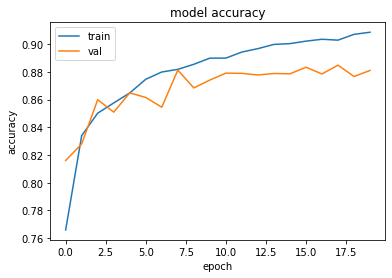

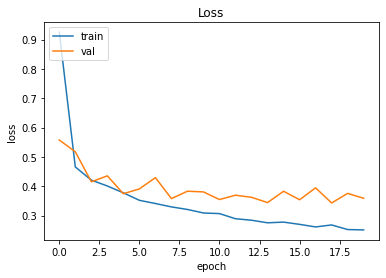

In [ ]:
# list all data in history
print(history_mlp1.history.keys()) 
# summarize history for accuracy
plt.plot(history_mlp1.history['accuracy'])
plt.plot(history_mlp1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history_mlp1.history['loss'])
plt.plot(history_mlp1.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## MLP2

In [ ]:
input_dim_mlp = X_train_mlp.shape[1]    #entrada tem dimensão 784

model_mlp2 = Sequential()

model_mlp2.add(Dense(1024,input_shape=(input_dim_mlp,),activation='relu'))  #hidden layer
model_mlp2.add(Dense(512,activation='relu'))
model_mlp2.add(Dense(256,activation='relu'))
model_mlp2.add(Dense(128,activation='relu'))
model_mlp2.add(Dense(64,activation='relu'))
model_mlp2.add(Dense(32,activation='relu'))
model_mlp2.add(Dense(num_classes, activation='softmax'))

model_mlp2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_mlp2.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_86 (Dense)            (None, 1024)              803840    
                                                                 
 dense_87 (Dense)            (None, 512)               524800    
                                                                 
 dense_88 (Dense)            (None, 256)               131328    
                                                                 
 dense_89 (Dense)            (None, 128)               32896     
                                                                 
 dense_90 (Dense)            (None, 64)                8256      
                                                                 
 dense_91 (Dense)            (None, 32)                2080      
                                                                 
 dense_92 (Dense)            (None, 10)              

In [ ]:
history_mlp2 = model_mlp2.fit(X_train_mlp, y_train_mlp, validation_data=(X_val_mlp, y_val_mlp), epochs=n_epochs,batch_size=32)

Epoch 1/20
1500/1500 [==============================] - 20s 13ms/step - loss: 1.0733 - accuracy: 0.7801 - val_loss: 0.4507 - val_accuracy: 0.8350
Epoch 2/20
1500/1500 [==============================] - 18s 12ms/step - loss: 0.4485 - accuracy: 0.8408 - val_loss: 0.4759 - val_accuracy: 0.8351
Epoch 3/20
1500/1500 [==============================] - 18s 12ms/step - loss: 0.4151 - accuracy: 0.8525 - val_loss: 0.4284 - val_accuracy: 0.8564
Epoch 4/20
1500/1500 [==============================] - 19s 12ms/step - loss: 0.3918 - accuracy: 0.8597 - val_loss: 0.3890 - val_accuracy: 0.8629
Epoch 5/20
1500/1500 [==============================] - 18s 12ms/step - loss: 0.3755 - accuracy: 0.8698 - val_loss: 0.3801 - val_accuracy: 0.8686
Epoch 6/20
1500/1500 [==============================] - 19s 12ms/step - loss: 0.3650 - accuracy: 0.8710 - val_loss: 0.4092 - val_accuracy: 0.8643
Epoch 7/20
1500/1500 [==============================] - 18s 12ms/step - loss: 0.3511 - accuracy: 0.8764 - val_loss: 0.3897 -

# Evaluation of Model MLP2

In [ ]:
#Loss function: Categorical Cross Entropy
cross_entropy_mlp2 = model_mlp2.evaluate(X_test_mlp,y_test_mlp,verbose=0)
cross_entropy_mlp2

[0.4018900692462921, 0.8762999773025513]

In [ ]:
test_predictions_mlp2 = model_mlp2.predict(X_test_mlp)
y_predicted_mlp2 = []
for i in range(10000):
  y_predicted_mlp2.append(np.argmax(test_predictions_mlp2[i]))
y_true = []
for i in range(10000):
  y_true.append(np.argmax(y_test_mlp[i]))

print(classification_report(y_true, y_predicted_mlp2))

313/313 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.88      0.74      0.81      1000
           1       0.99      0.97      0.98      1000
           2       0.75      0.83      0.79      1000
           3       0.88      0.90      0.89      1000
           4       0.78      0.81      0.79      1000
           5       0.94      0.98      0.96      1000
           6       0.67      0.70      0.68      1000
           7       0.96      0.93      0.95      1000
           8       0.99      0.95      0.97      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


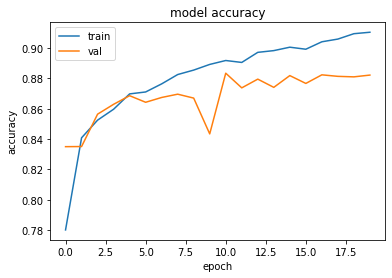

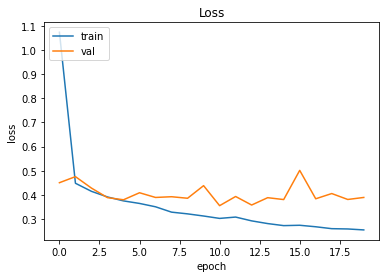

In [ ]:
# list all data in history
print(history_mlp2.history.keys()) 
# summarize history for accuracy
plt.plot(history_mlp2.history['accuracy'])
plt.plot(history_mlp2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history_mlp2.history['loss'])
plt.plot(history_mlp2.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## MLP3

In [ ]:
input_dim_mlp = X_train_mlp.shape[1]    #entrada tem dimensão 784

model_mlp3 = Sequential()

model_mlp3.add(Dense(2048,input_shape=(input_dim_mlp,),activation='relu'))  #hidden layer
model_mlp3.add(Dense(1024,activation='relu'))
model_mlp3.add(Dense(512,activation='relu'))
model_mlp3.add(Dense(256,activation='relu'))
model_mlp3.add(Dense(128,activation='relu'))
model_mlp3.add(Dense(64,activation='relu'))
model_mlp3.add(Dense(32,activation='relu'))
model_mlp3.add(Dense(num_classes, activation='softmax'))

model_mlp3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_mlp3.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_93 (Dense)            (None, 2048)              1607680   
                                                                 
 dense_94 (Dense)            (None, 1024)              2098176   
                                                                 
 dense_95 (Dense)            (None, 512)               524800    
                                                                 
 dense_96 (Dense)            (None, 256)               131328    
                                                                 
 dense_97 (Dense)            (None, 128)               32896     
                                                                 
 dense_98 (Dense)            (None, 64)                8256      
                                                                 
 dense_99 (Dense)            (None, 32)              

In [ ]:
history_mlp3 = model_mlp3.fit(X_train_mlp, y_train_mlp, validation_data=(X_val_mlp, y_val_mlp), epochs=n_epochs,batch_size=32)

Epoch 1/20
1500/1500 [==============================] - 48s 32ms/step - loss: 1.0457 - accuracy: 0.7881 - val_loss: 0.4864 - val_accuracy: 0.8278
Epoch 2/20
1500/1500 [==============================] - 47s 31ms/step - loss: 0.4452 - accuracy: 0.8426 - val_loss: 0.4896 - val_accuracy: 0.8278
Epoch 3/20
1500/1500 [==============================] - 47s 31ms/step - loss: 0.4136 - accuracy: 0.8544 - val_loss: 0.4763 - val_accuracy: 0.8468
Epoch 4/20
1500/1500 [==============================] - 47s 31ms/step - loss: 0.3950 - accuracy: 0.8620 - val_loss: 0.4103 - val_accuracy: 0.8579
Epoch 5/20
1500/1500 [==============================] - 47s 31ms/step - loss: 0.3691 - accuracy: 0.8698 - val_loss: 0.3868 - val_accuracy: 0.8670
Epoch 6/20
1500/1500 [==============================] - 47s 32ms/step - loss: 0.3535 - accuracy: 0.8772 - val_loss: 0.3885 - val_accuracy: 0.8714
Epoch 7/20
1500/1500 [==============================] - 46s 31ms/step - loss: 0.3516 - accuracy: 0.8782 - val_loss: 0.3604 -

# Evaluation of Model MLP3

In [ ]:
#Loss function: Categorical Cross Entropy
cross_entropy_mlp3 = model_mlp3.evaluate(X_test_mlp,y_test_mlp,verbose=0)
cross_entropy_mlp3

[0.4203632175922394, 0.8705000281333923]

In [ ]:
test_predictions_mlp3 = model_mlp3.predict(X_test_mlp)
y_predicted_mlp3 = []
for i in range(10000):
  y_predicted_mlp3.append(np.argmax(test_predictions_mlp3[i]))
y_true = []
for i in range(10000):
  y_true.append(np.argmax(y_test_mlp[i]))

print(classification_report(y_true, y_predicted_mlp3))

313/313 [==============================] - 3s 8ms/step
              precision    recall  f1-score   support

           0       0.86      0.78      0.82      1000
           1       0.99      0.97      0.98      1000
           2       0.73      0.84      0.78      1000
           3       0.89      0.90      0.89      1000
           4       0.86      0.63      0.73      1000
           5       0.97      0.95      0.96      1000
           6       0.64      0.77      0.70      1000
           7       0.96      0.92      0.94      1000
           8       0.96      0.97      0.97      1000
           9       0.92      0.98      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


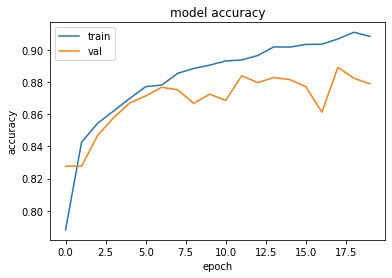

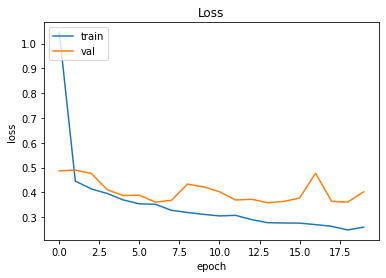

In [ ]:
# list all data in history
print(history_mlp3.history.keys()) 
# summarize history for accuracy
plt.plot(history_mlp3.history['accuracy'])
plt.plot(history_mlp3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history_mlp3.history['loss'])
plt.plot(history_mlp3.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## MLP4

In [ ]:
input_dim_mlp = X_train_mlp.shape[1]    #entrada tem dimensão 784

model_mlp4 = Sequential()

model_mlp4.add(Dense(2048,input_shape=(input_dim_mlp,),activation='relu'))  #hidden layer
model_mlp4.add(Dense(1024,activation='relu'))
model_mlp4.add(Dense(512,activation='relu'))
model_mlp4.add(Dense(256,activation='relu'))
model_mlp4.add(Dense(128,activation='relu'))
model_mlp4.add(Dense(64,activation='relu'))
model_mlp4.add(Dense(32,activation='relu'))
model_mlp4.add(Dropout(0.2)) #to avoid overfitting
model_mlp4.add(Dense(num_classes, activation='softmax'))

model_mlp4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_mlp4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 2048)              1607680   
                                                                 
 dense_9 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_10 (Dense)            (None, 512)               524800    
                                                                 
 dense_11 (Dense)            (None, 256)               131328    
                                                                 
 dense_12 (Dense)            (None, 128)               32896     
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 32)               

In [ ]:
history_mlp4 = model_mlp4.fit(X_train_mlp, y_train_mlp, validation_data=(X_val_mlp, y_val_mlp), epochs=n_epochs,batch_size=32)

Epoch 1/20
1500/1500 [==============================] - 7s 4ms/step - loss: 1.2899 - accuracy: 0.6928 - val_loss: 0.5528 - val_accuracy: 0.8015
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.6008 - accuracy: 0.7933 - val_loss: 0.5398 - val_accuracy: 0.8250
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5247 - accuracy: 0.8236 - val_loss: 0.4471 - val_accuracy: 0.8501
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4744 - accuracy: 0.8392 - val_loss: 0.4642 - val_accuracy: 0.8369
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4491 - accuracy: 0.8464 - val_loss: 0.4008 - val_accuracy: 0.8588
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4339 - accuracy: 0.8532 - val_loss: 0.4147 - val_accuracy: 0.8652
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4039 - accuracy: 0.8618 - val_loss: 0.3933 - val_accuracy:

# Evaluation of Model MLP4

In [ ]:
#Loss function: Categorical Cross Entropy
cross_entropy_mlp4 = model_mlp4.evaluate(X_test_mlp,y_test_mlp,verbose=0)
cross_entropy_mlp4

[0.4240942895412445, 0.8691999912261963]

In [ ]:
test_predictions_mlp4 = model_mlp4.predict(X_test_mlp)
y_predicted_mlp4 = []
for i in range(10000):
  y_predicted_mlp4.append(np.argmax(test_predictions_mlp4[i]))
y_true = []
for i in range(10000):
  y_true.append(np.argmax(y_test_mlp[i]))

print(classification_report(y_true, y_predicted_mlp4))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.88      0.74      0.80      1000
           1       0.99      0.97      0.98      1000
           2       0.73      0.86      0.79      1000
           3       0.82      0.92      0.87      1000
           4       0.86      0.69      0.77      1000
           5       0.97      0.95      0.96      1000
           6       0.67      0.70      0.68      1000
           7       0.95      0.90      0.93      1000
           8       0.97      0.98      0.97      1000
           9       0.90      0.98      0.94      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


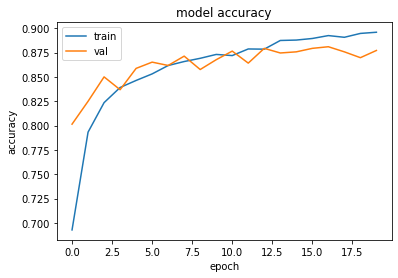

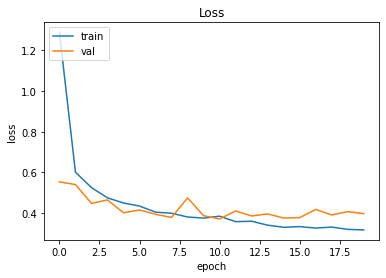

In [ ]:
# list all data in history
print(history_mlp4.history.keys()) 
# summarize history for accuracy
plt.plot(history_mlp4.history['accuracy'])
plt.plot(history_mlp4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history_mlp4.history['loss'])
plt.plot(history_mlp4.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## MLP5

In [39]:
input_dim_mlp = X_train_mlp.shape[1]    #entrada tem dimensão 784

model_mlp5 = Sequential()

model_mlp5.add(Dense(512,input_shape=(input_dim_mlp,),activation='relu'))  #hidden layer
model_mlp5.add(Dense(256,activation='relu'))
model_mlp5.add(Dense(128,activation='relu'))
model_mlp5.add(Dense(128,activation='relu'))
model_mlp5.add(Dense(num_classes, activation='softmax'))

model_mlp5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_mlp5.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 512)               401920    
                                                                 
 dense_33 (Dense)            (None, 256)               131328    
                                                                 
 dense_34 (Dense)            (None, 128)               32896     
                                                                 
 dense_35 (Dense)            (None, 128)               16512     
                                                                 
 dense_36 (Dense)            (None, 10)                1290      
                                                                 
Total params: 583,946
Trainable params: 583,946
Non-trainable params: 0
_________________________________________________________________


In [40]:
history_mlp5 = model_mlp5.fit(X_train_mlp, y_train_mlp, validation_data=(X_val_mlp, y_val_mlp), epochs=n_epochs)

Epoch 1/20
1500/1500 [==============================] - 6s 4ms/step - loss: 1.3078 - accuracy: 0.7719 - val_loss: 0.5148 - val_accuracy: 0.8174
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4909 - accuracy: 0.8257 - val_loss: 0.5042 - val_accuracy: 0.8267
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4431 - accuracy: 0.8407 - val_loss: 0.5266 - val_accuracy: 0.8257
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4241 - accuracy: 0.8505 - val_loss: 0.4394 - val_accuracy: 0.8474
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4013 - accuracy: 0.8564 - val_loss: 0.3923 - val_accuracy: 0.8658
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3794 - accuracy: 0.8657 - val_loss: 0.4183 - val_accuracy: 0.8419
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3642 - accuracy: 0.8709 - val_loss: 0.4125 - val_accuracy:

# Evaluation of Model MLP5

In [41]:
#Loss function: Categorical Cross Entropy
cross_entropy_mlp5 = model_mlp5.evaluate(X_test_mlp,y_test_mlp,verbose=0)
cross_entropy_mlp5

[0.37533333897590637, 0.8813999891281128]

In [42]:
test_predictions_mlp5 = model_mlp5.predict(X_test_mlp)
y_predicted_mlp5 = []
for i in range(10000):
  y_predicted_mlp5.append(np.argmax(test_predictions_mlp5[i]))
y_true = []
for i in range(10000):
  y_true.append(np.argmax(y_test_mlp[i]))

print(classification_report(y_true, y_predicted_mlp5))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.82      0.85      0.83      1000
           1       0.99      0.96      0.98      1000
           2       0.82      0.78      0.79      1000
           3       0.88      0.89      0.88      1000
           4       0.77      0.84      0.81      1000
           5       0.97      0.95      0.96      1000
           6       0.71      0.69      0.70      1000
           7       0.93      0.94      0.94      1000
           8       0.98      0.96      0.97      1000
           9       0.94      0.96      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


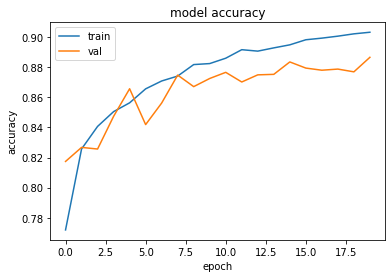

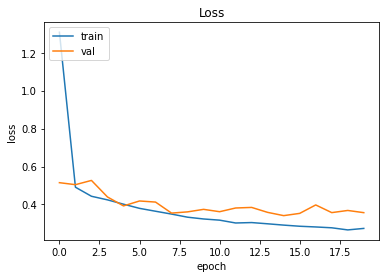

In [43]:
# list all data in history
print(history_mlp5.history.keys()) 
# summarize history for accuracy
plt.plot(history_mlp5.history['accuracy'])
plt.plot(history_mlp5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history_mlp5.history['loss'])
plt.plot(history_mlp5.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## MLP6

In [44]:
input_dim_mlp = X_train_mlp.shape[1]    #entrada tem dimensão 784

model_mlp6 = Sequential()

model_mlp6.add(Dense(4096,input_shape=(input_dim_mlp,),activation='relu'))  #hidden layer
model_mlp6.add(Dense(1024,activation='relu'))
model_mlp6.add(Dense(512,activation='relu'))
model_mlp6.add(Dense(256,activation='relu'))
model_mlp6.add(Dense(128,activation='relu'))
model_mlp6.add(Dense(num_classes, activation='softmax'))

model_mlp6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_mlp6.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 4096)              3215360   
                                                                 
 dense_38 (Dense)            (None, 1024)              4195328   
                                                                 
 dense_39 (Dense)            (None, 512)               524800    
                                                                 
 dense_40 (Dense)            (None, 256)               131328    
                                                                 
 dense_41 (Dense)            (None, 128)               32896     
                                                                 
 dense_42 (Dense)            (None, 10)                1290      
                                                                 
Total params: 8,101,002
Trainable params: 8,101,002
No

In [45]:
history_mlp6 = model_mlp6.fit(X_train_mlp, y_train_mlp, validation_data=(X_val_mlp, y_val_mlp), epochs=n_epochs)

Epoch 1/20
1500/1500 [==============================] - 7s 4ms/step - loss: 2.6609 - accuracy: 0.7941 - val_loss: 0.4724 - val_accuracy: 0.8414
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4518 - accuracy: 0.8402 - val_loss: 0.4420 - val_accuracy: 0.8457
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4204 - accuracy: 0.8510 - val_loss: 0.4065 - val_accuracy: 0.8559
Epoch 4/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4100 - accuracy: 0.8549 - val_loss: 0.4079 - val_accuracy: 0.8583
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3837 - accuracy: 0.8671 - val_loss: 0.3955 - val_accuracy: 0.8570
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3708 - accuracy: 0.8701 - val_loss: 0.3732 - val_accuracy: 0.8707
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3634 - accuracy: 0.8732 - val_loss: 0.3829 - val_accuracy:

# Evaluation of Model MLP6

In [46]:
#Loss function: Categorical Cross Entropy
cross_entropy_mlp6 = model_mlp6.evaluate(X_test_mlp,y_test_mlp,verbose=0)
cross_entropy_mlp6

[0.3767763376235962, 0.8828999996185303]

In [47]:
test_predictions_mlp6 = model_mlp6.predict(X_test_mlp)
y_predicted_mlp6 = []
for i in range(10000):
  y_predicted_mlp6.append(np.argmax(test_predictions_mlp6[i]))
y_true = []
for i in range(10000):
  y_true.append(np.argmax(y_test_mlp[i]))

print(classification_report(y_true, y_predicted_mlp6))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.79      0.81      0.80      1000
           3       0.87      0.89      0.88      1000
           4       0.80      0.79      0.79      1000
           5       0.97      0.96      0.96      1000
           6       0.73      0.65      0.68      1000
           7       0.93      0.96      0.95      1000
           8       0.97      0.97      0.97      1000
           9       0.97      0.94      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


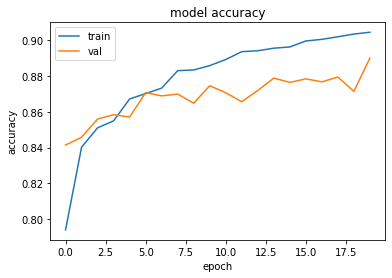

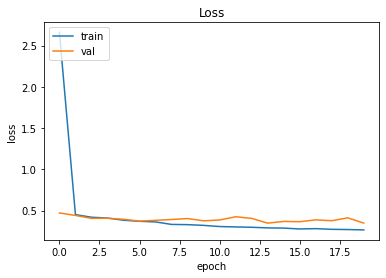

In [48]:
# list all data in history
print(history_mlp6.history.keys()) 
# summarize history for accuracy
plt.plot(history_mlp6.history['accuracy'])
plt.plot(history_mlp6.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history_mlp6.history['loss'])
plt.plot(history_mlp6.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## MLP7

In [49]:
input_dim_mlp = X_train_mlp.shape[1]    #entrada tem dimensão 784

model_mlp7 = Sequential()

model_mlp7.add(Dense(512,input_shape=(input_dim_mlp,),activation='relu'))  #hidden layer
model_mlp7.add(Dense(256,activation='relu'))
model_mlp7.add(Dense(256,activation='relu'))
model_mlp7.add(Dense(256,activation='relu'))
model_mlp7.add(Dense(256,activation='relu'))
model_mlp7.add(Dense(256,activation='relu'))
model_mlp7.add(Dense(256,activation='relu'))
model_mlp7.add(Dense(256,activation='relu'))
model_mlp7.add(Dense(128,activation='relu'))
model_mlp7.add(Dense(num_classes, activation='softmax'))

model_mlp7.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_mlp7.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 512)               401920    
                                                                 
 dense_44 (Dense)            (None, 256)               131328    
                                                                 
 dense_45 (Dense)            (None, 256)               65792     
                                                                 
 dense_46 (Dense)            (None, 256)               65792     
                                                                 
 dense_47 (Dense)            (None, 256)               65792     
                                                                 
 dense_48 (Dense)            (None, 256)               65792     
                                                                 
 dense_49 (Dense)            (None, 256)              

In [50]:
history_mlp7 = model_mlp7.fit(X_train_mlp, y_train_mlp, validation_data=(X_val_mlp, y_val_mlp), epochs=n_epochs)

Epoch 1/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.6765 - accuracy: 0.7805 - val_loss: 0.5067 - val_accuracy: 0.8158
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4656 - accuracy: 0.8366 - val_loss: 0.4524 - val_accuracy: 0.8447
Epoch 3/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.4346 - accuracy: 0.8472 - val_loss: 0.4030 - val_accuracy: 0.8513
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4131 - accuracy: 0.8591 - val_loss: 0.4552 - val_accuracy: 0.8487
Epoch 5/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3932 - accuracy: 0.8628 - val_loss: 0.4099 - val_accuracy: 0.8686
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3715 - accuracy: 0.8702 - val_loss: 0.4294 - val_accuracy: 0.8555
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3660 - accuracy: 0.8721 - val_loss: 0.4508 - val_accuracy:

# Evaluation of Model MLP7

In [51]:
#Loss function: Categorical Cross Entropy
cross_entropy_mlp7 = model_mlp7.evaluate(X_test_mlp,y_test_mlp,verbose=0)
cross_entropy_mlp7

[0.37973612546920776, 0.8687000274658203]

In [52]:
test_predictions_mlp7 = model_mlp7.predict(X_test_mlp)
y_predicted_mlp7 = []
for i in range(10000):
  y_predicted_mlp7.append(np.argmax(test_predictions_mlp7[i]))
y_true = []
for i in range(10000):
  y_true.append(np.argmax(y_test_mlp[i]))

print(classification_report(y_true, y_predicted_mlp7))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1000
           1       0.99      0.96      0.98      1000
           2       0.81      0.78      0.79      1000
           3       0.89      0.87      0.88      1000
           4       0.75      0.84      0.79      1000
           5       0.92      0.97      0.95      1000
           6       0.67      0.65      0.66      1000
           7       0.95      0.84      0.89      1000
           8       0.96      0.98      0.97      1000
           9       0.91      0.97      0.94      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


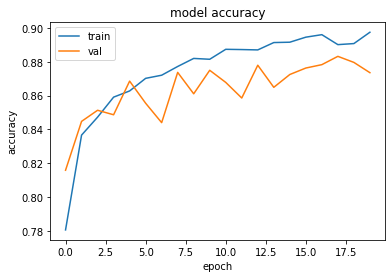

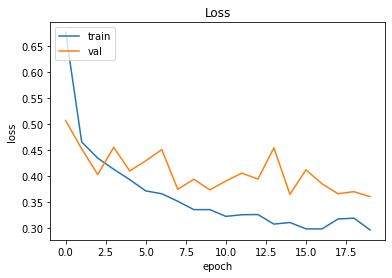

In [53]:
# list all data in history
print(history_mlp7.history.keys()) 
# summarize history for accuracy
plt.plot(history_mlp7.history['accuracy'])
plt.plot(history_mlp7.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history_mlp7.history['loss'])
plt.plot(history_mlp7.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## MLP8

In [54]:
input_dim_mlp = X_train_mlp.shape[1]    #entrada tem dimensão 784

model_mlp8 = Sequential()

model_mlp8.add(Dense(1024,input_shape=(input_dim_mlp,),activation='relu'))  #hidden layer
model_mlp8.add(Dense(512,activation='relu'))
model_mlp8.add(Dense(256,activation='relu'))
model_mlp8.add(Dense(256,activation='relu'))
model_mlp8.add(Dense(256,activation='relu'))
model_mlp8.add(Dense(256,activation='relu'))
model_mlp8.add(Dense(256,activation='relu'))
model_mlp8.add(Dense(256,activation='relu'))
model_mlp8.add(Dense(128,activation='relu'))
model_mlp8.add(Dense(num_classes, activation='softmax'))

model_mlp8.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_mlp8.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_53 (Dense)            (None, 1024)              803840    
                                                                 
 dense_54 (Dense)            (None, 512)               524800    
                                                                 
 dense_55 (Dense)            (None, 256)               131328    
                                                                 
 dense_56 (Dense)            (None, 256)               65792     
                                                                 
 dense_57 (Dense)            (None, 256)               65792     
                                                                 
 dense_58 (Dense)            (None, 256)               65792     
                                                                 
 dense_59 (Dense)            (None, 256)             

In [55]:
history_mlp8 = model_mlp8.fit(X_train_mlp, y_train_mlp, validation_data=(X_val_mlp, y_val_mlp), epochs=n_epochs)

Epoch 1/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.7320 - accuracy: 0.7843 - val_loss: 0.5545 - val_accuracy: 0.7974
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4546 - accuracy: 0.8390 - val_loss: 0.4326 - val_accuracy: 0.8478
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4229 - accuracy: 0.8522 - val_loss: 0.4705 - val_accuracy: 0.8535
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4037 - accuracy: 0.8596 - val_loss: 0.4011 - val_accuracy: 0.8622
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3865 - accuracy: 0.8671 - val_loss: 0.3907 - val_accuracy: 0.8635
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3752 - accuracy: 0.8705 - val_loss: 0.4008 - val_accuracy: 0.8628
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3545 - accuracy: 0.8766 - val_loss: 0.3822 - val_accuracy:

# Evaluation of Model MLP8

In [56]:
#Loss function: Categorical Cross Entropy
cross_entropy_mlp8 = model_mlp8.evaluate(X_test_mlp,y_test_mlp,verbose=0)
cross_entropy_mlp8

[0.40746283531188965, 0.8675000071525574]

In [57]:
test_predictions_mlp8 = model_mlp8.predict(X_test_mlp)
y_predicted_mlp8 = []
for i in range(10000):
  y_predicted_mlp8.append(np.argmax(test_predictions_mlp7[i]))
y_true = []
for i in range(10000):
  y_true.append(np.argmax(y_test_mlp[i]))

print(classification_report(y_true, y_predicted_mlp8))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1000
           1       0.99      0.96      0.98      1000
           2       0.81      0.78      0.79      1000
           3       0.89      0.87      0.88      1000
           4       0.75      0.84      0.79      1000
           5       0.92      0.97      0.95      1000
           6       0.67      0.65      0.66      1000
           7       0.95      0.84      0.89      1000
           8       0.96      0.98      0.97      1000
           9       0.91      0.97      0.94      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


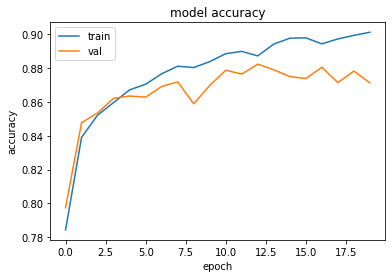

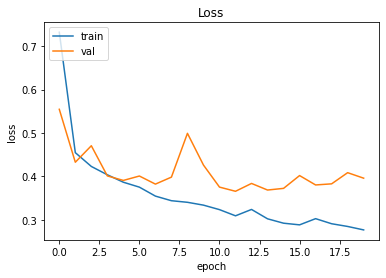

In [58]:
# list all data in history
print(history_mlp7.history.keys()) 
# summarize history for accuracy
plt.plot(history_mlp8.history['accuracy'])
plt.plot(history_mlp8.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history_mlp8.history['loss'])
plt.plot(history_mlp8.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## MLP9

In [67]:
input_dim_mlp = X_train_mlp.shape[1]    #entrada tem dimensão 784

model_mlp9 = Sequential()

model_mlp9.add(Dense(1024,input_shape=(input_dim_mlp,),activation='relu'))  #hidden layer
model_mlp9.add(Dense(512,activation='relu'))
model_mlp9.add(Dense(512,activation='relu'))
model_mlp9.add(Dense(256,activation='relu'))
model_mlp9.add(Dropout(0.5)) 
model_mlp9.add(Dense(256,activation='relu'))
model_mlp9.add(Dense(256,activation='relu'))
model_mlp9.add(Dense(256,activation='relu'))
model_mlp9.add(Dense(256,activation='relu'))
model_mlp9.add(Dense(128,activation='relu'))
model_mlp9.add(Dense(num_classes, activation='softmax'))

model_mlp9.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_mlp9.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_73 (Dense)            (None, 1024)              803840    
                                                                 
 dense_74 (Dense)            (None, 512)               524800    
                                                                 
 dense_75 (Dense)            (None, 512)               262656    
                                                                 
 dense_76 (Dense)            (None, 256)               131328    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_77 (Dense)            (None, 256)               65792     
                                                                 
 dense_78 (Dense)            (None, 256)             

In [68]:
history_mlp9 = model_mlp9.fit(X_train_mlp, y_train_mlp, validation_data=(X_val_mlp, y_val_mlp), epochs=n_epochs)

Epoch 1/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.8536 - accuracy: 0.7225 - val_loss: 0.5348 - val_accuracy: 0.8036
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5318 - accuracy: 0.8192 - val_loss: 0.5650 - val_accuracy: 0.7976
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4729 - accuracy: 0.8370 - val_loss: 0.5353 - val_accuracy: 0.8284
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4366 - accuracy: 0.8497 - val_loss: 0.4528 - val_accuracy: 0.8591
Epoch 5/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.4215 - accuracy: 0.8554 - val_loss: 0.4167 - val_accuracy: 0.8637
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4053 - accuracy: 0.8635 - val_loss: 0.3941 - val_accuracy: 0.8640
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3923 - accuracy: 0.8672 - val_loss: 0.4164 - val_accuracy:

# Evaluation of Model MLP9

In [69]:
#Loss function: Categorical Cross Entropy
cross_entropy_mlp9 = model_mlp9.evaluate(X_test_mlp,y_test_mlp,verbose=0)
cross_entropy_mlp9

[0.47474637627601624, 0.8615999817848206]

In [70]:
test_predictions_mlp9 = model_mlp9.predict(X_test_mlp)
y_predicted_mlp9 = []
for i in range(10000):
  y_predicted_mlp9.append(np.argmax(test_predictions_mlp7[i]))
y_true = []
for i in range(10000):
  y_true.append(np.argmax(y_test_mlp[i]))

print(classification_report(y_true, y_predicted_mlp9))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1000
           1       0.99      0.96      0.98      1000
           2       0.81      0.78      0.79      1000
           3       0.89      0.87      0.88      1000
           4       0.75      0.84      0.79      1000
           5       0.92      0.97      0.95      1000
           6       0.67      0.65      0.66      1000
           7       0.95      0.84      0.89      1000
           8       0.96      0.98      0.97      1000
           9       0.91      0.97      0.94      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


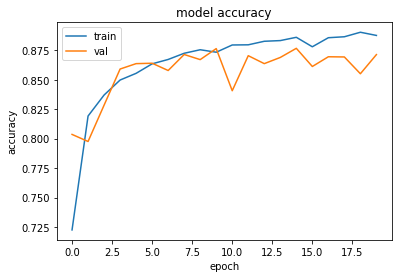

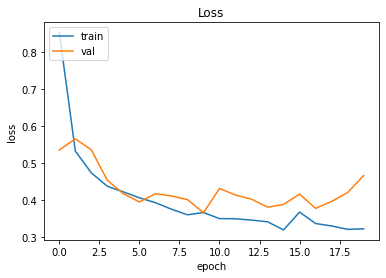

In [71]:
# list all data in history
print(history_mlp9.history.keys()) 
# summarize history for accuracy
plt.plot(history_mlp9.history['accuracy'])
plt.plot(history_mlp9.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history_mlp9.history['loss'])
plt.plot(history_mlp9.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# **Análise**

# **Matriz de Confusão dos dois melhores modelos CNN**

Dentre os modelos CNN, aqueles que tiveram a melhor performance para a quantidade de épocas que nós padronizamos (20) foram aqueles que atingiram acurácia de 91%:

* Modelo 6 (1.732.490 parâmetros)

* Modelo 13 (914.714 parâmetros)

Modelos que alcançaram acurácia de 91% em certo treinamento, mas em treinamento posterior alcançaram 90%:

* Modelo 11 (503.202 parâmetros)
* Modelo 12 (914.714 parâmetros)
* Modelo 15 (759.066 parâmetros)

Fato interessante: o modelo 7 CNN alcançou acurácia de 88% usando apenas 110 mil parâmeotros (aproximadamente).

Fato interessante: o modelo 14 CNN alcançou acurácia de 90% usando apenas 169.214 parâmetros.

## Conclusão: os dois modelos CNN que obtiveram melhor acurácia foram o modelo 6 e o modelo 13.

Matriz de confusão do modelo 6

Text(0.5, 1.0, 'Confusion Matrix')

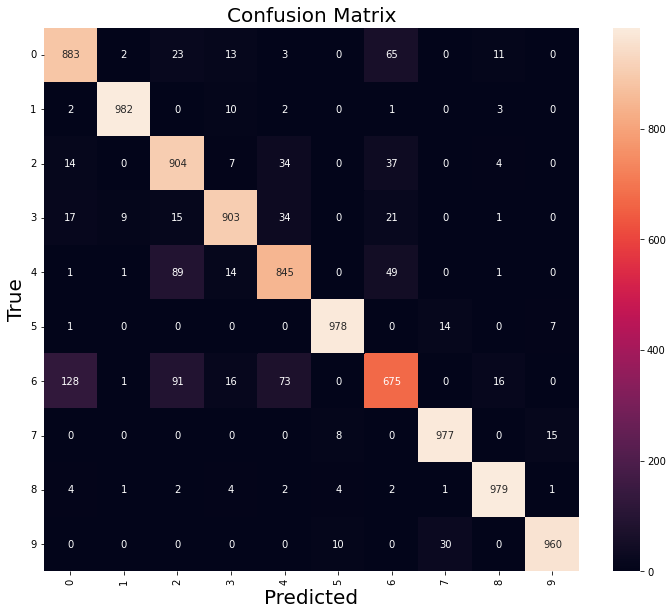

In [139]:
cm = confusion_matrix(y_true, y_predicted_6)
# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(12, 10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.tick_bottom()
ax.set_ylabel('True', fontsize=20)
plt.yticks(rotation=0)

plt.title('Confusion Matrix', fontsize=20)

Matriz de confusão do modelo 13

Text(0.5, 1.0, 'Confusion Matrix')

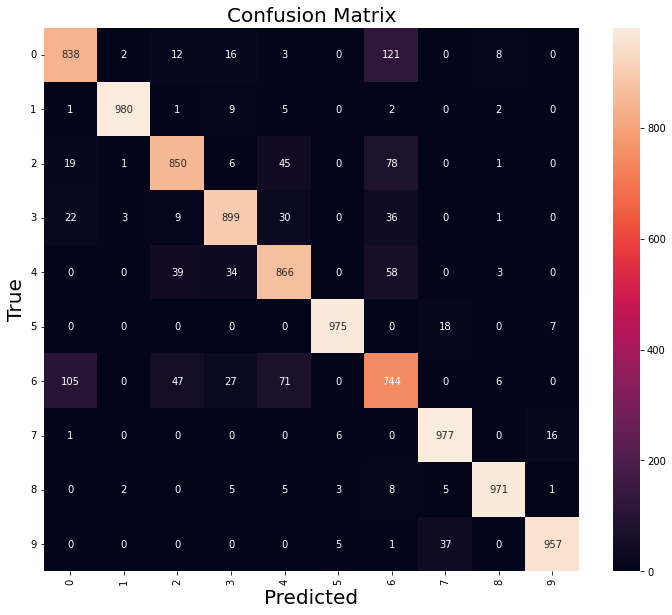

In [140]:
cm = confusion_matrix(y_true, y_predicted_13)
# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(12, 10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.tick_bottom()
ax.set_ylabel('True', fontsize=20)
plt.yticks(rotation=0)

plt.title('Confusion Matrix', fontsize=20)

No modelo 6 e no modelo 13, foram utilizadas as mesmas camadas convolucionais e de maxpooling (32, 64 e 128 filtros e maxpooling com pool_size (2,2)). A diferença entre eles se deu nas camadas densamente conectadas. Enquanto no modelo 6, foi utilizada uma camada de 128 neurônios e uma camada de dropout (0.5) antes da camada de saída, no modelo 13, foram utilizadas 3 camadas, com 64, 32 e 16 neurônios respectivamente e nenhuma camada de dropout.

Em ambos os modelos foram utilizadas as mesmas funções de ativação (ReLU em todas as camadas, exceto na última, na qual foi usada softmax).

## Comparação com MLP

Tentamos diversos tipos de arquitetura para MLP e em nenhum deles conseguimos superar a marca de 88% de acurácia.

Os nossos modelos que alcançaram a acurácia de 88% foram os seguintes:

* MLP2 (1.503.530 parâmetros)
* MLP5 (583.946 parâmetros)
* MLP6 (8.101.002 parâmetros)

É notável o fato de que, mesmo utilizando uma quantidade gigante de parâmetros (8.101.002, como no caso da MLP6), não fomos capazes de superar a barreira de 88% de acurácia.

Enquanto, por outro lado, utilizando redes convolucionais, conseguimos alcançar uma acurácia de 90% utilizando apenas 169.214 parâmetros (caso da CNN 14).